In [306]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Finding Derivatives:
When we dont know which function we are dealing with, There are three common way to find the derivatives and each are having their own drawbacks.
We can also use this when we are trying to find the derivatives that sometimes blow up when h is very small.
Its only based on the data points we have in our dataset.
$$\text{Forward differences,\; }f'(x_{n}) \approx \frac{f(x_{n+1} - f(x_{n}))}{ x_{n+1} - x_{n}}$$
$$\text{Backward differences,\; }f'(x_{n}) \approx \frac{f(x_{n} - f(x_{n-1}))}{ x_{n} - x_{n-1}}$$
$$\text{Central differences,\; }f'(x_{n}) \approx \frac{f(x_{n+1} - f(x_{n-1}))}{x_{n+1} - x_{n-1}} $$


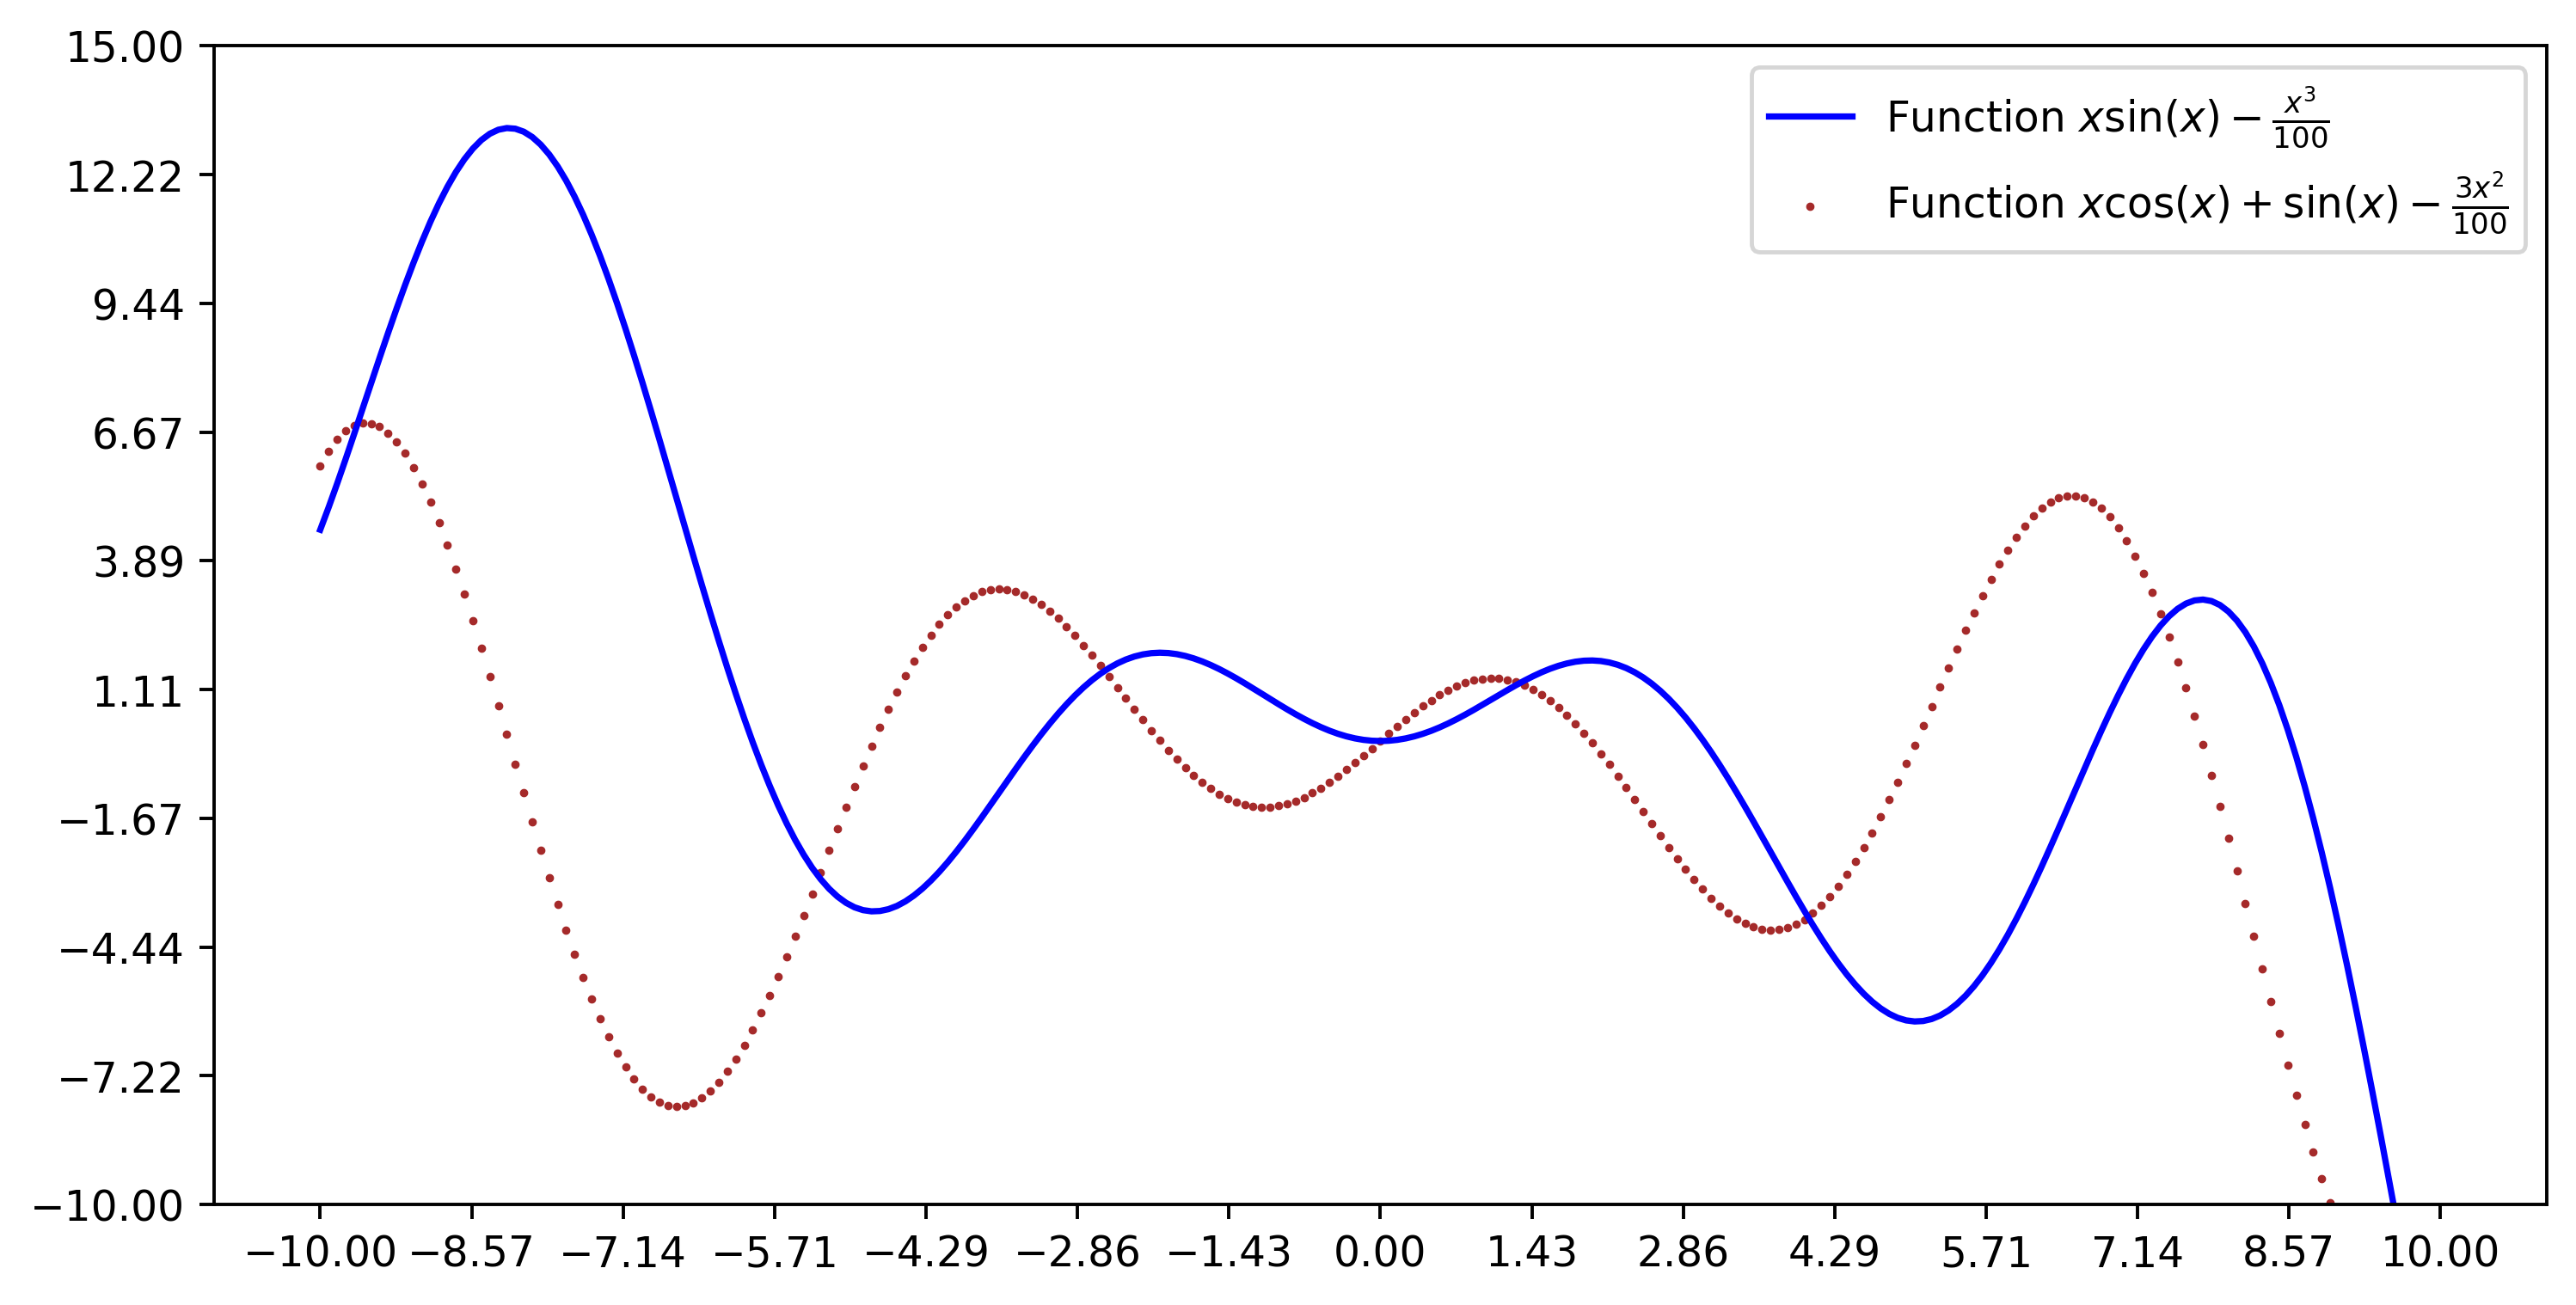

In [307]:
def my_function(x):
    return np.sin(x)*x-(1/100)*(x**3),np.sin(x)+x*np.cos(x)-(3/100*(x**2))
def setup_plot():
    plt.figure(figsize=(10,5),dpi=350)
    plt.ylim(-10,15)
    plt.xticks(np.linspace(-10,10,15))
    plt.yticks(np.linspace(-10,15,10))
setup_plot()
x_array=np.linspace(-10,10,251)
func_y_array, deri_y_array =my_function(x=x_array)
plt.plot(x_array,func_y_array,label="Function $x\\sin(x) -\\frac{x^3}{100}$",color="blue")
plt.scatter(x_array,deri_y_array,label="Function $x\\cos(x)+ \\sin(x) -\\frac{3x^2}{100}$",color="brown",s=1)
plt.legend(loc="upper right")
plt.show()

In [308]:
h=0.08

def only_my_function(x):
    return np.sin(x)*x-(1/100)*(x**3)
def for_diff(x,f=only_my_function):
    val=(f(x+h) - f(x))/h
    return val
def back_diff(x,f=only_my_function):
    val=(f(x) - f(x - h))/h
    return val
def cent_diff(x,f=only_my_function):
    val=(f(x+h)-f(x - h))/(2*h)
    return val

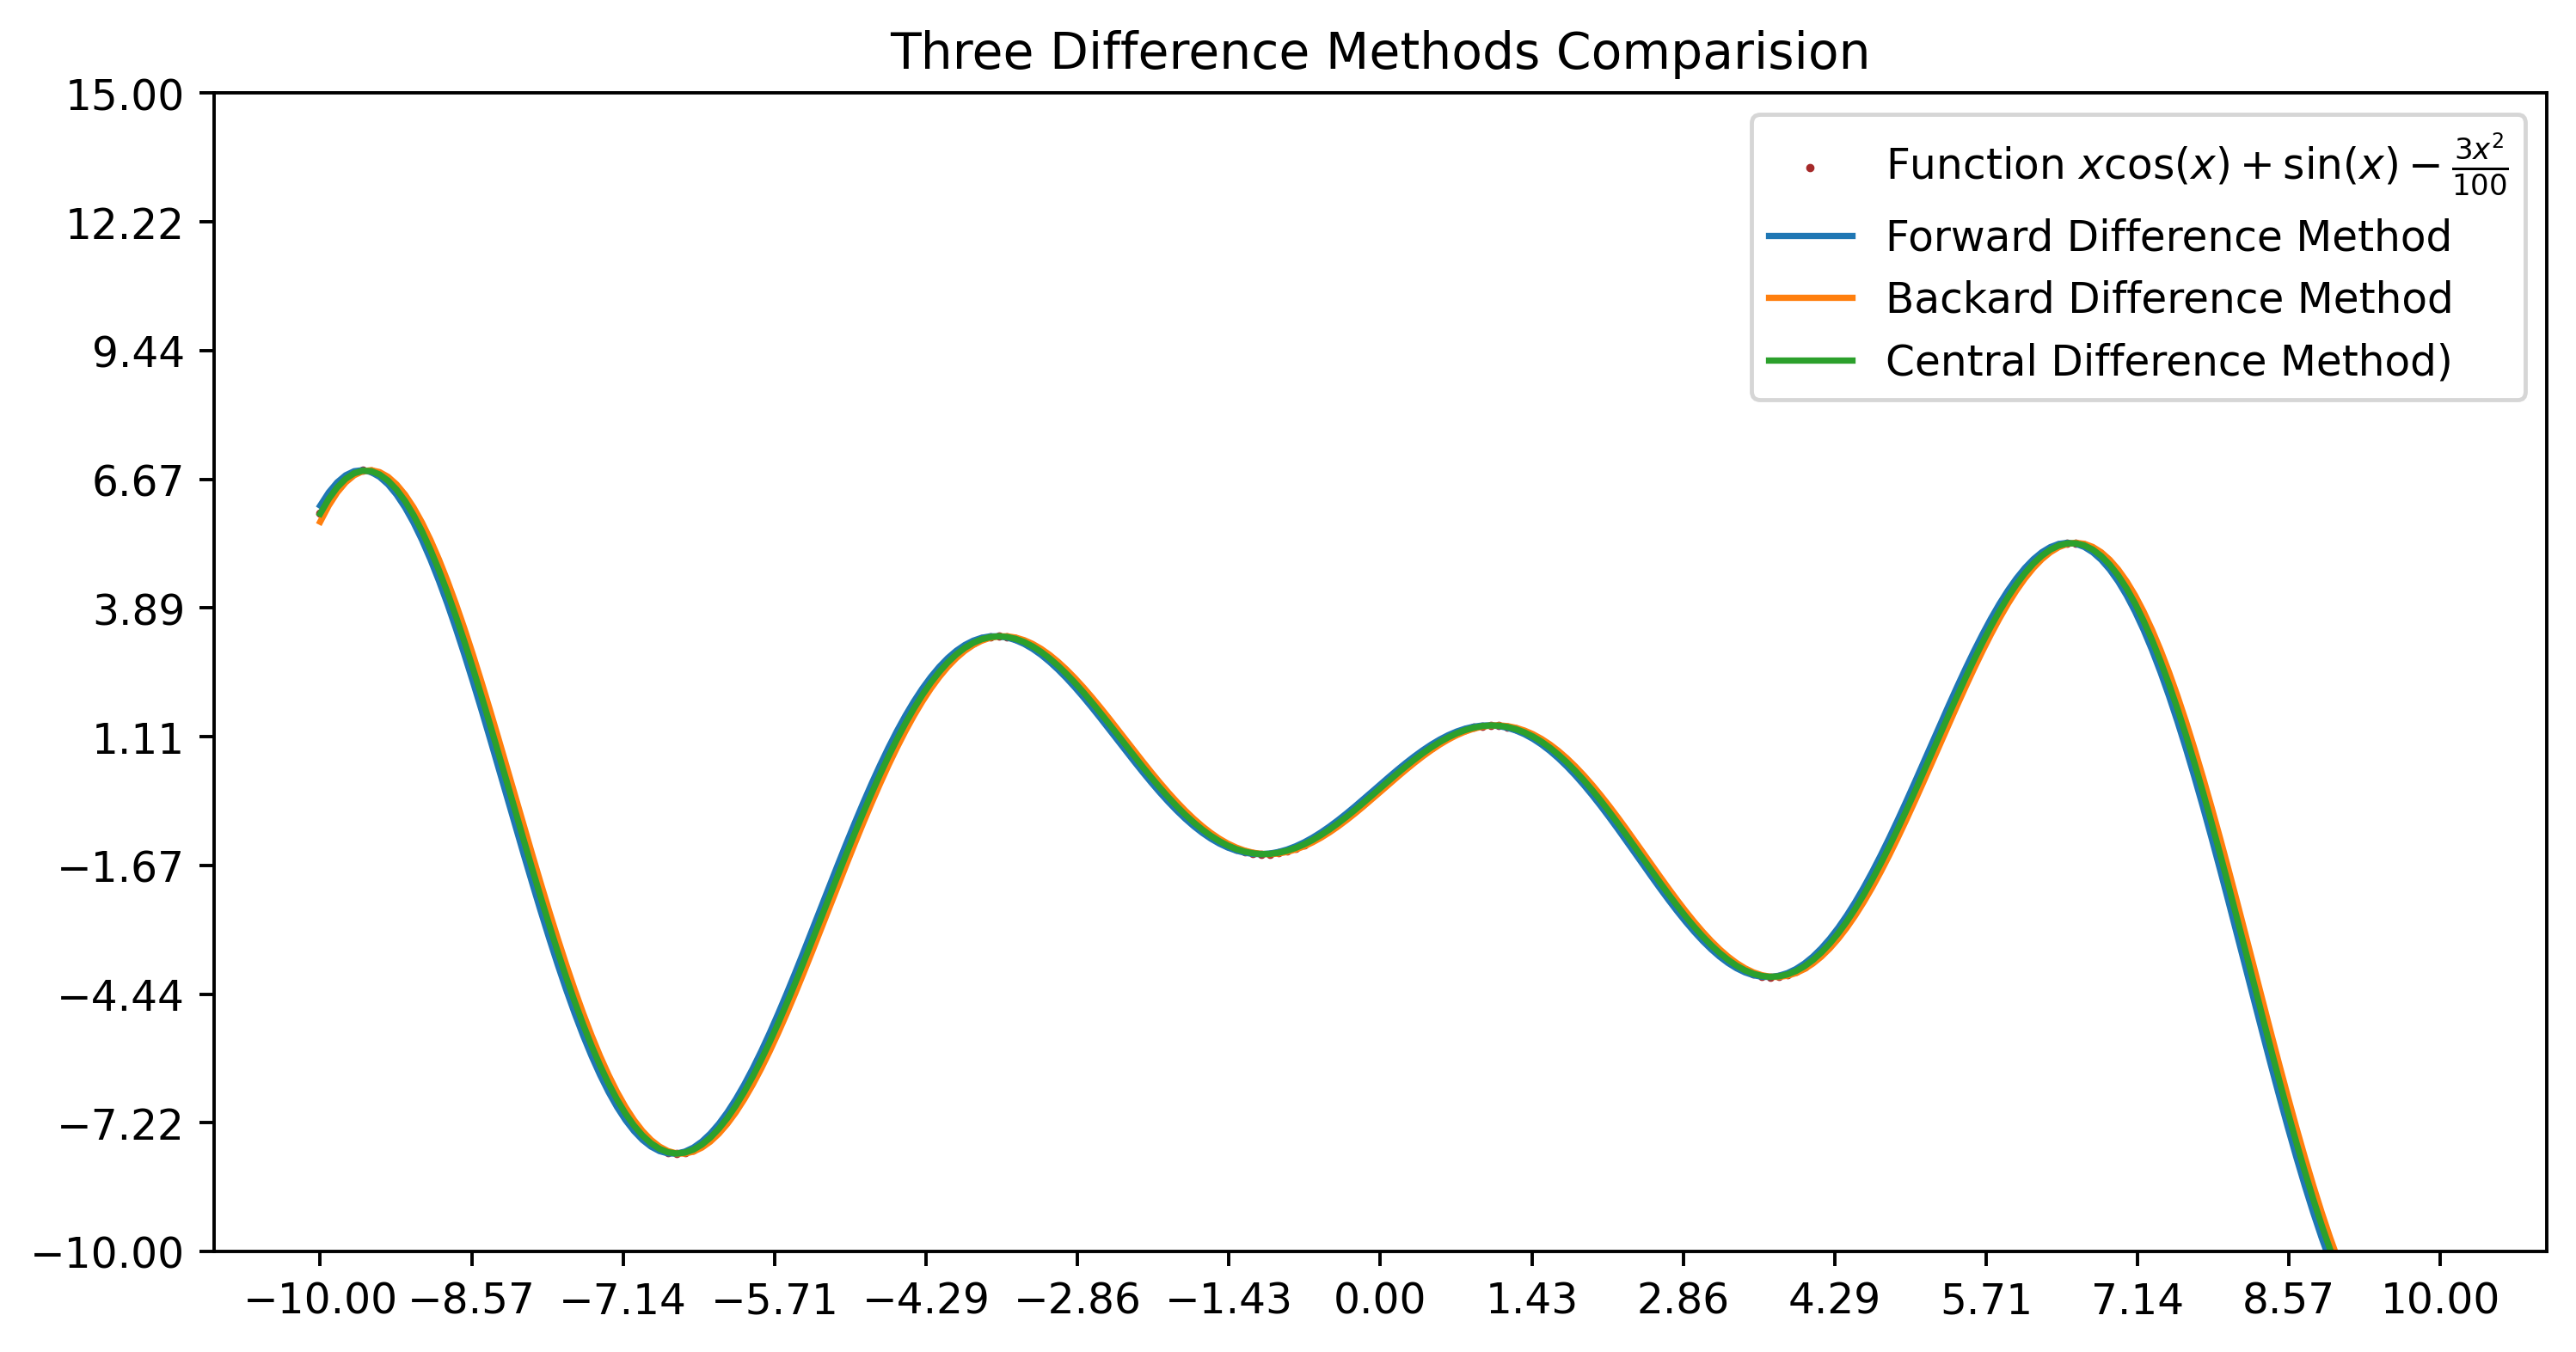

In [309]:
setup_plot()
plt.scatter(x_array,deri_y_array,label="Function $x\\cos(x)+ \\sin(x) -\\frac{3x^2}{100}$",color="brown",s=1)
plt.plot(x_array,for_diff(x_array),label="Forward Difference Method")
plt.plot(x_array,back_diff(x_array),label="Backard Difference Method")
plt.plot(x_array,cent_diff(x_array),label="Central Difference Method)")
plt.legend(loc="upper right")
plt.title("Three Difference Methods Comparision")
plt.show()

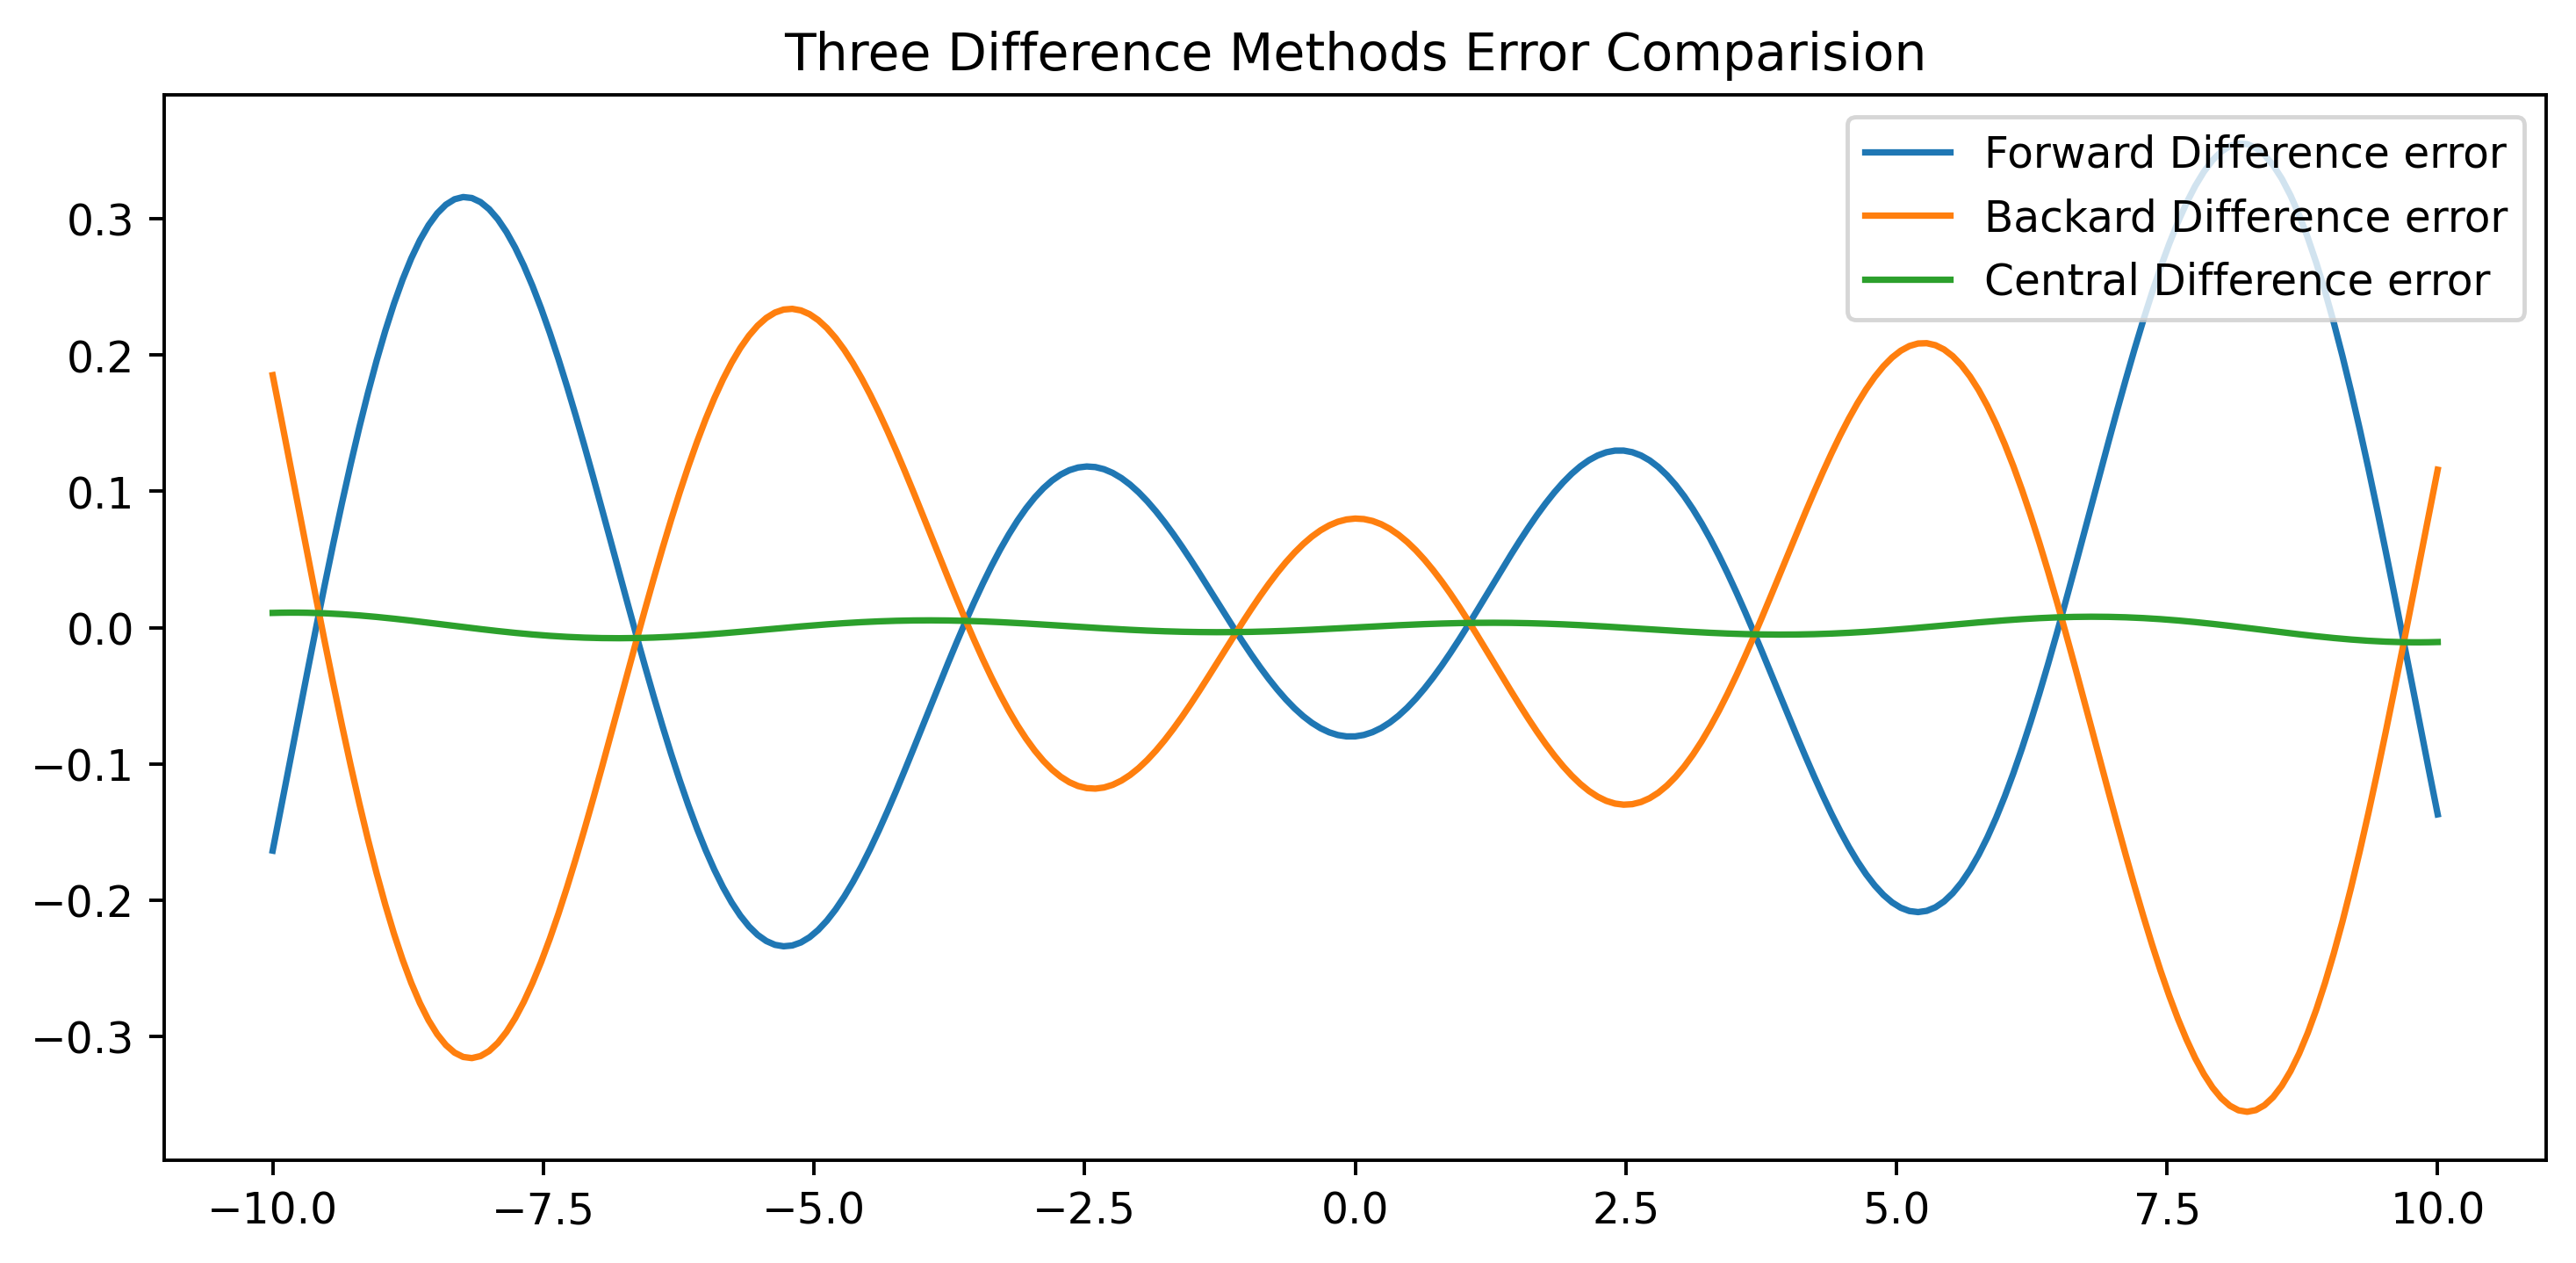

In [310]:
def setup_plot_new():
    plt.figure(figsize=(10,4.5),dpi=350)
def error_analysis(calc_y,act_y=deri_y_array):
    return deri_y_array-calc_y
setup_plot_new()
plt.plot(x_array,error_analysis(for_diff(x_array)),label="Forward Difference error")
plt.plot(x_array,error_analysis(back_diff(x_array)),label="Backard Difference error")
plt.plot(x_array,error_analysis(cent_diff(x_array)),label="Central Difference error")
plt.legend(loc="upper right")
plt.title("Three Difference Methods Error Comparision")
plt.show()

The More accurate method to interpolate the derivatives is Richardson Extrapolation method,
$$f'(x)=\frac{1}{12h} [f(x - 2h) +8f(x+h)-8(x-h)-f(x+2h)]+ \mathcal{O}(h^4)$$

[]

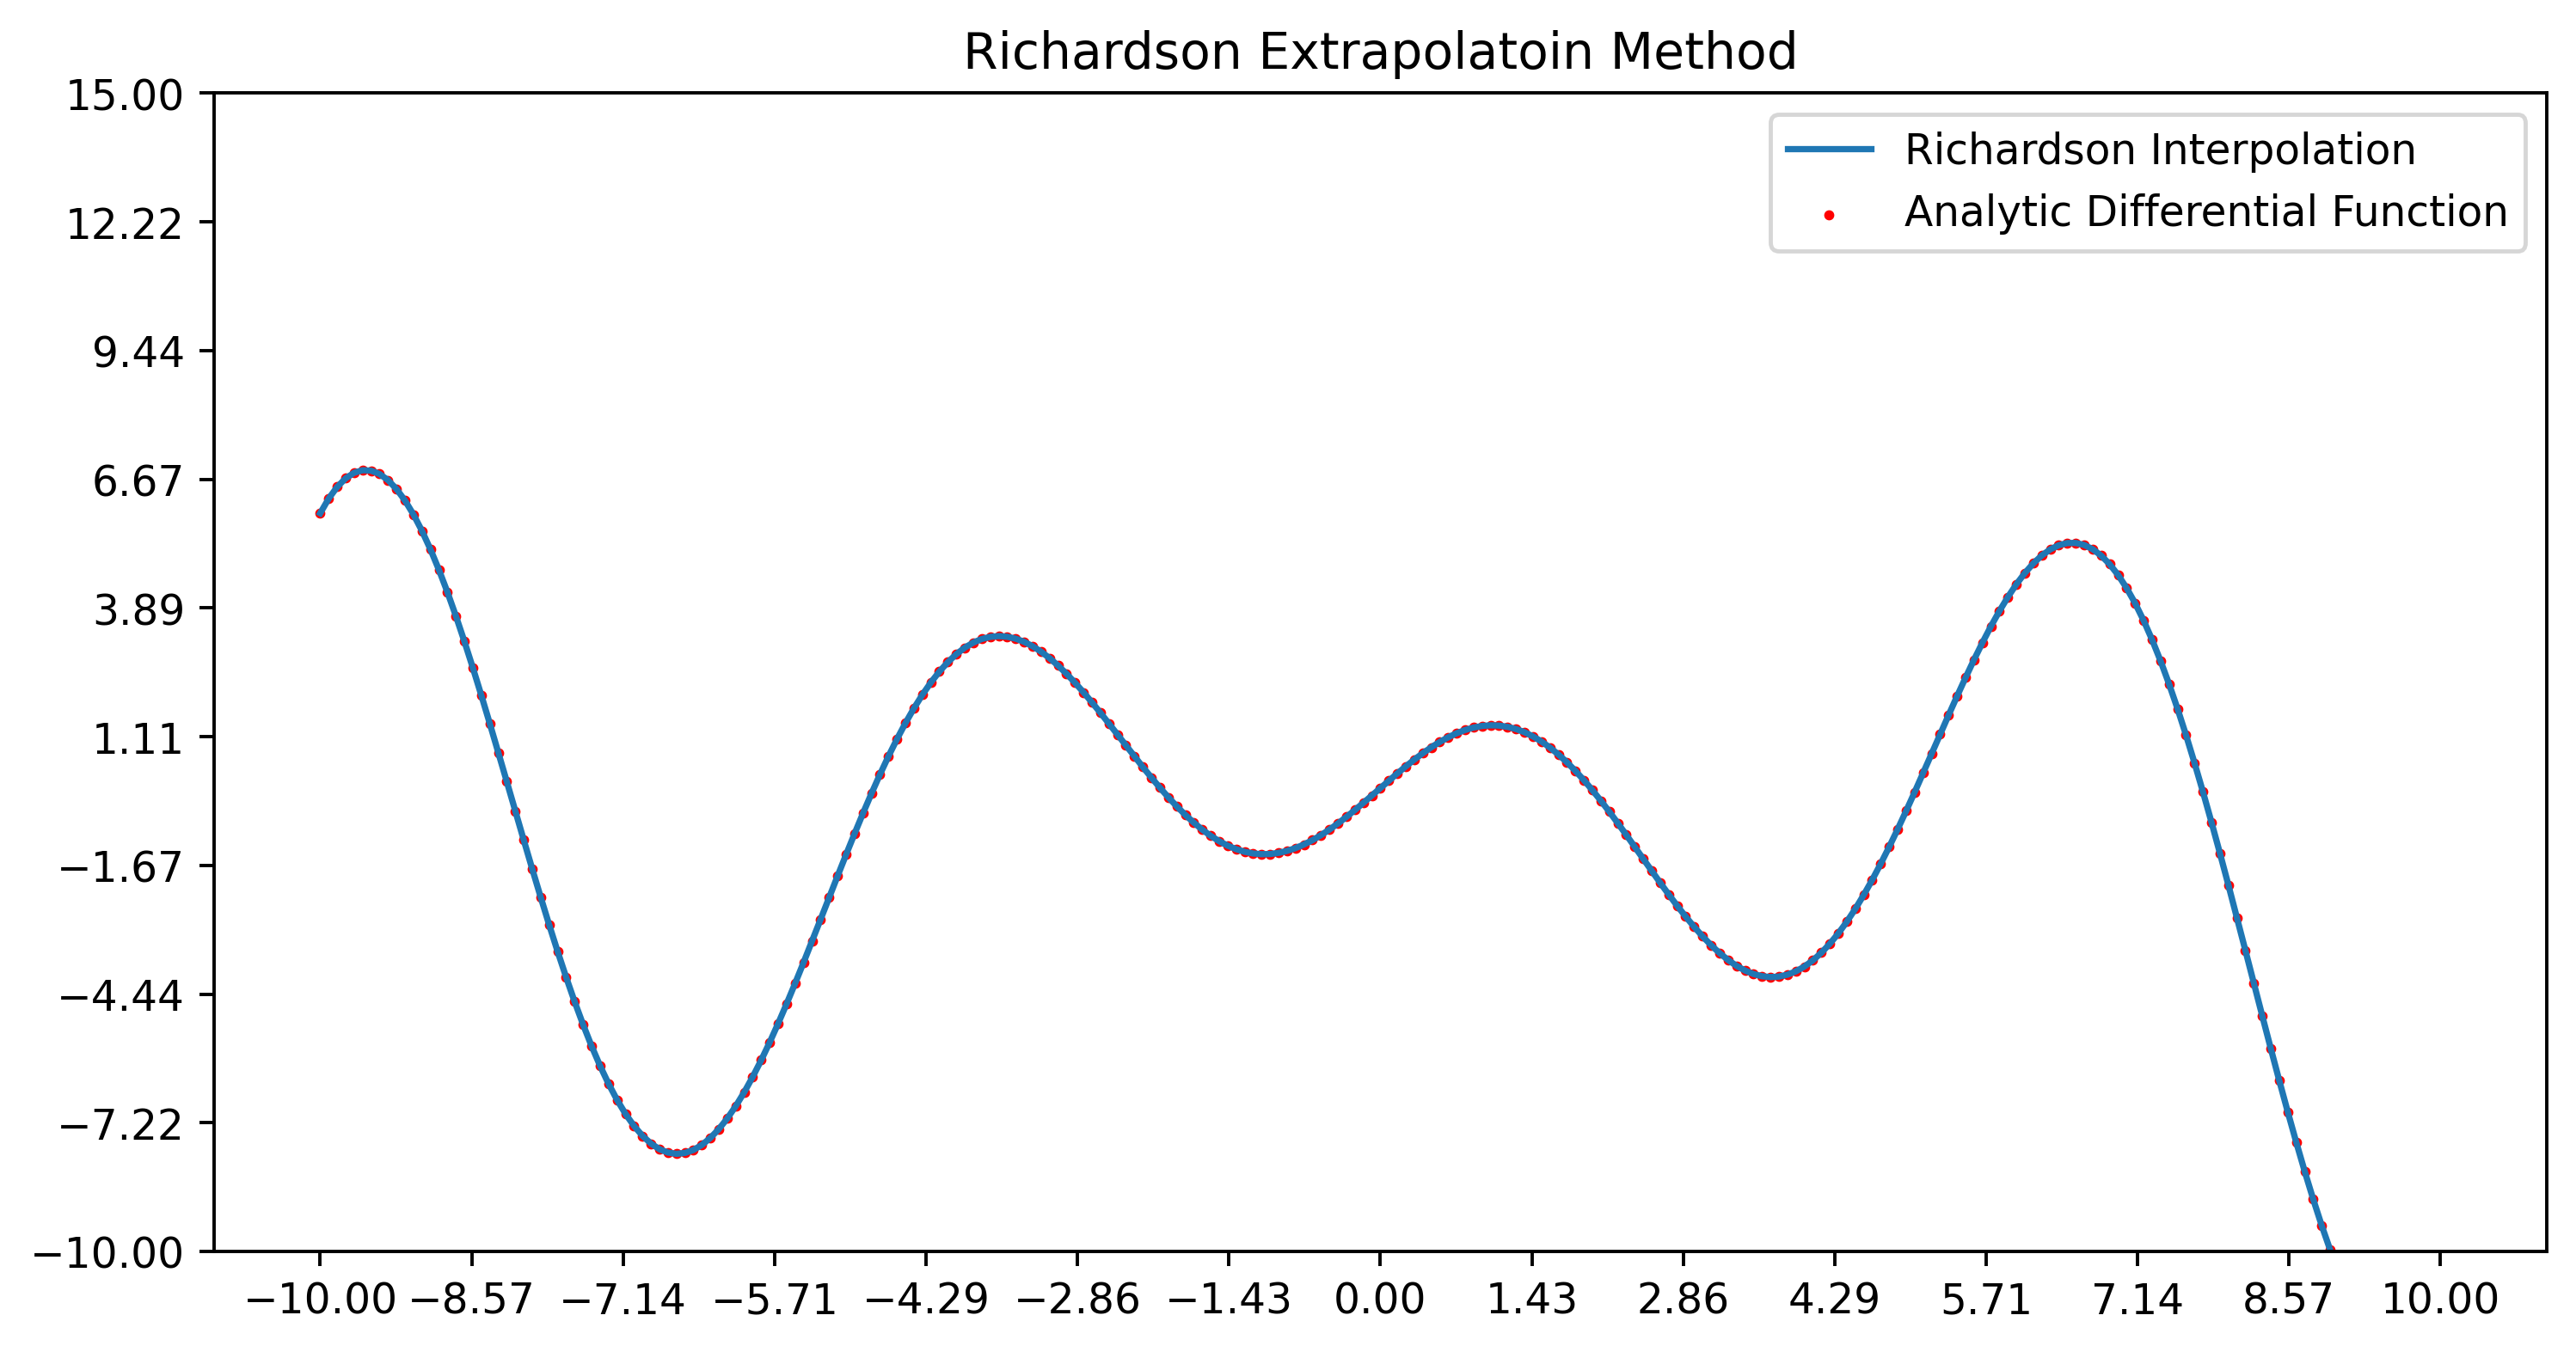

In [311]:
def rich_meth(x,f=only_my_function):
    val=1/(12*h)*(f(x-(2*h))-8*f(x-h) +8*f(x+h)-f(x+(2*h)))
    return val
setup_plot()
plt.plot(x_array,rich_meth(x_array),label="Richardson Interpolation")
plt.scatter(x_array,my_function(x_array)[1],s=2,color="red",label="Analytic Differential Function")
plt.legend()
plt.title("Richardson Extrapolatoin Method")
plt.plot()

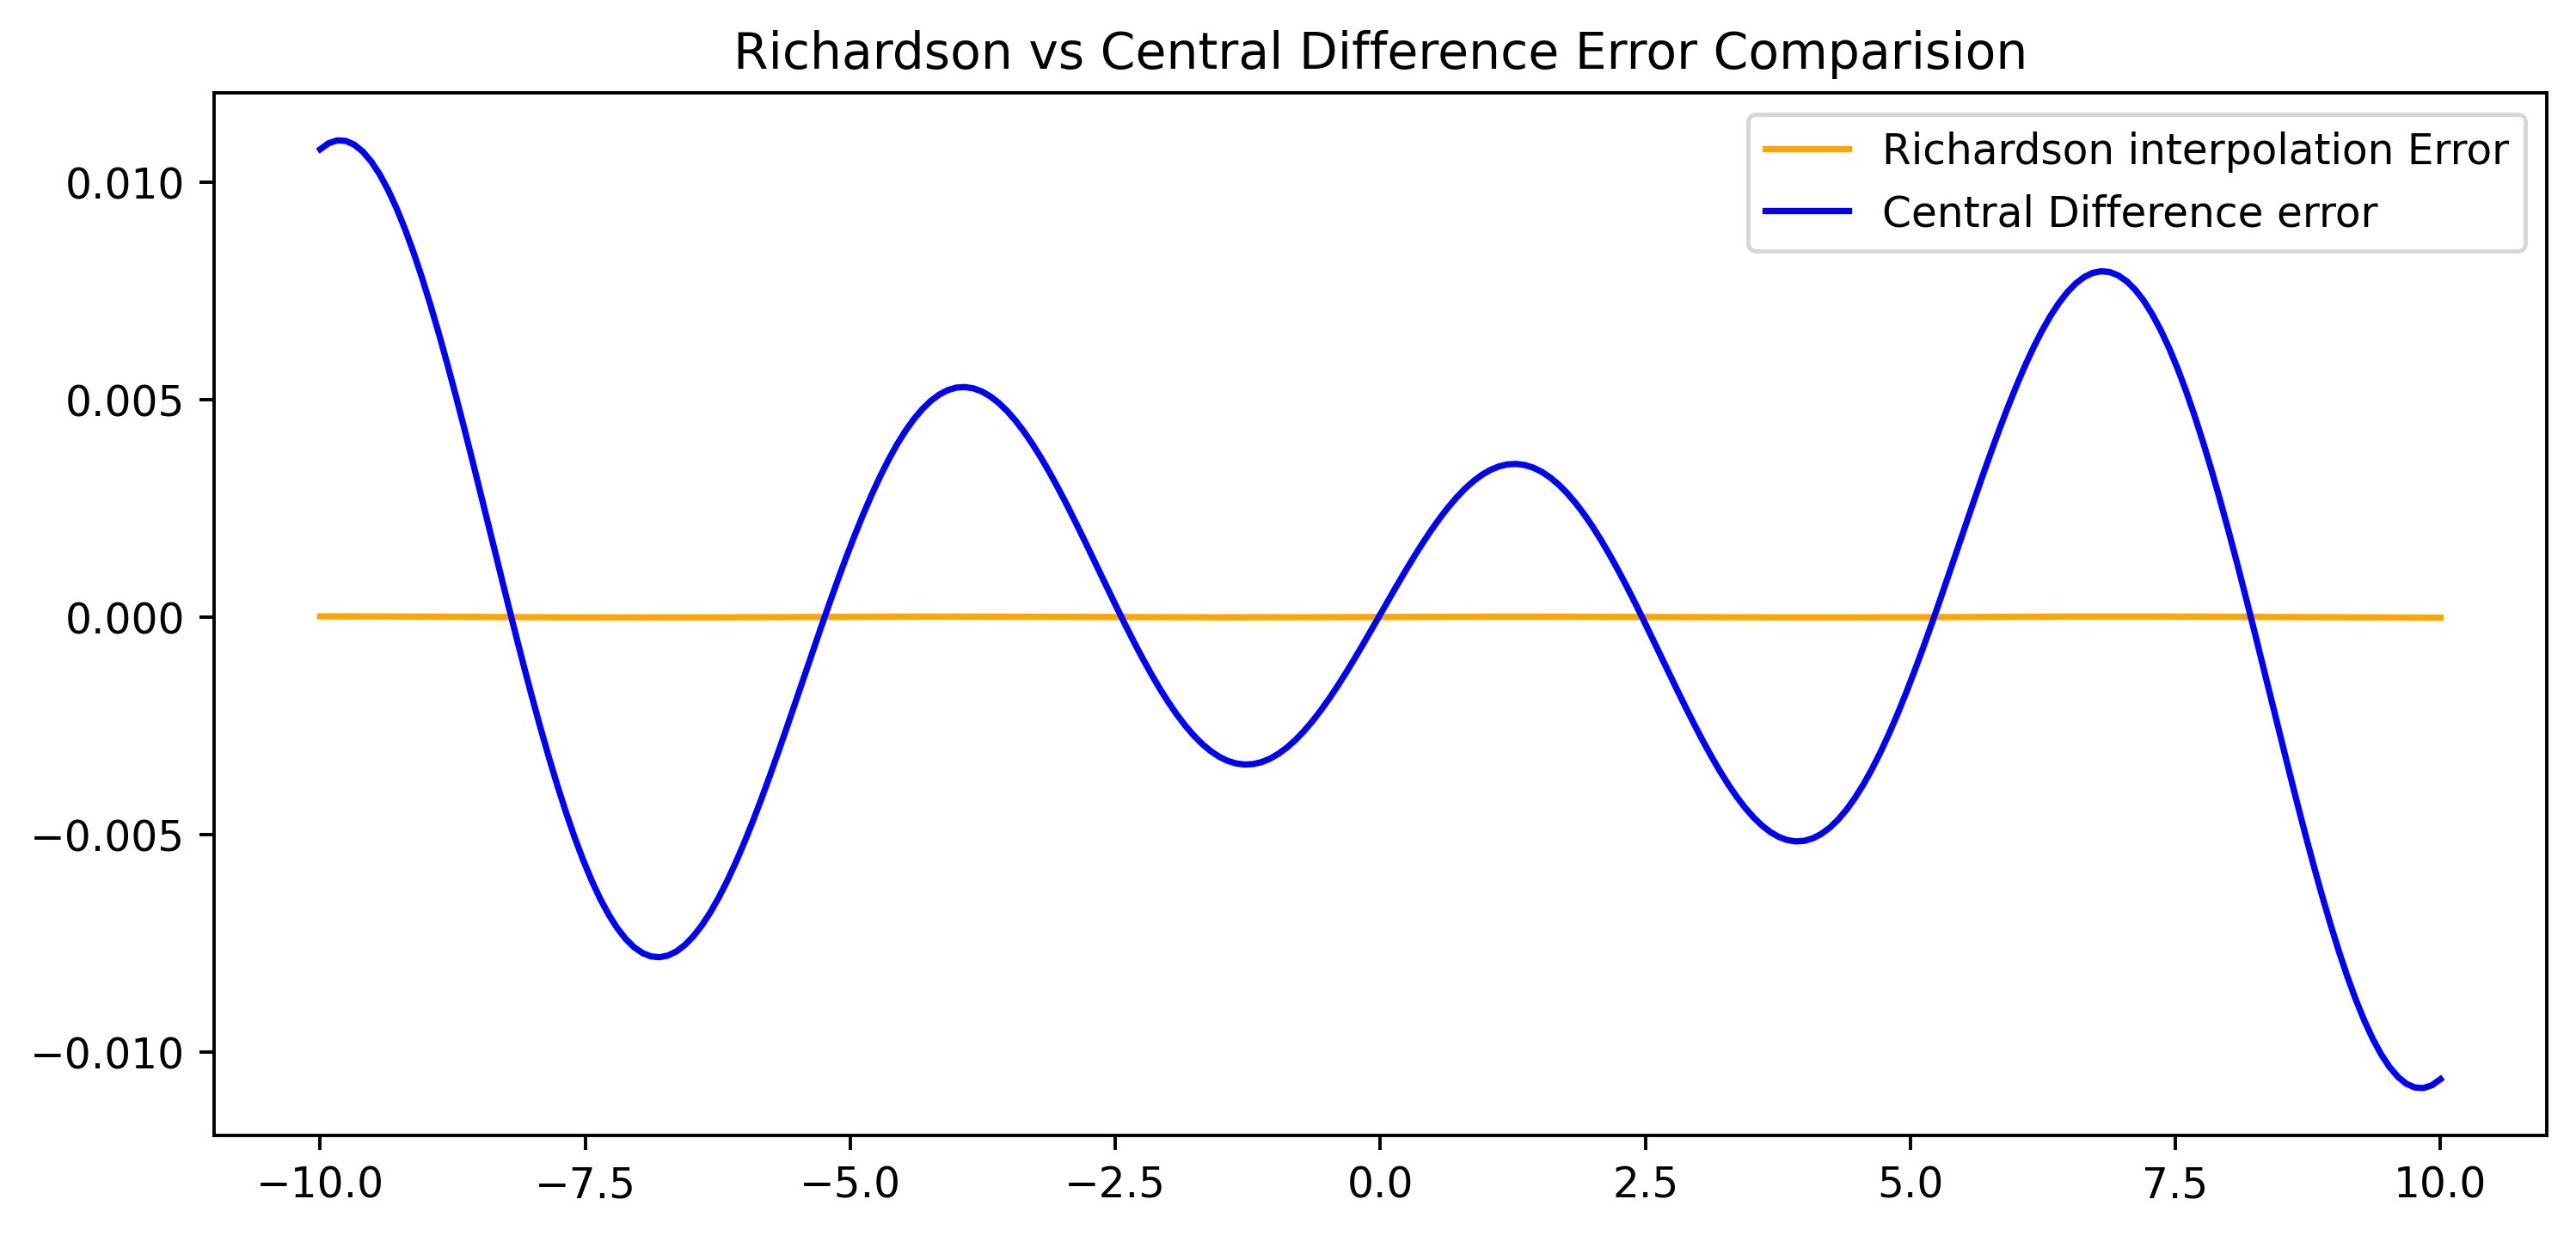

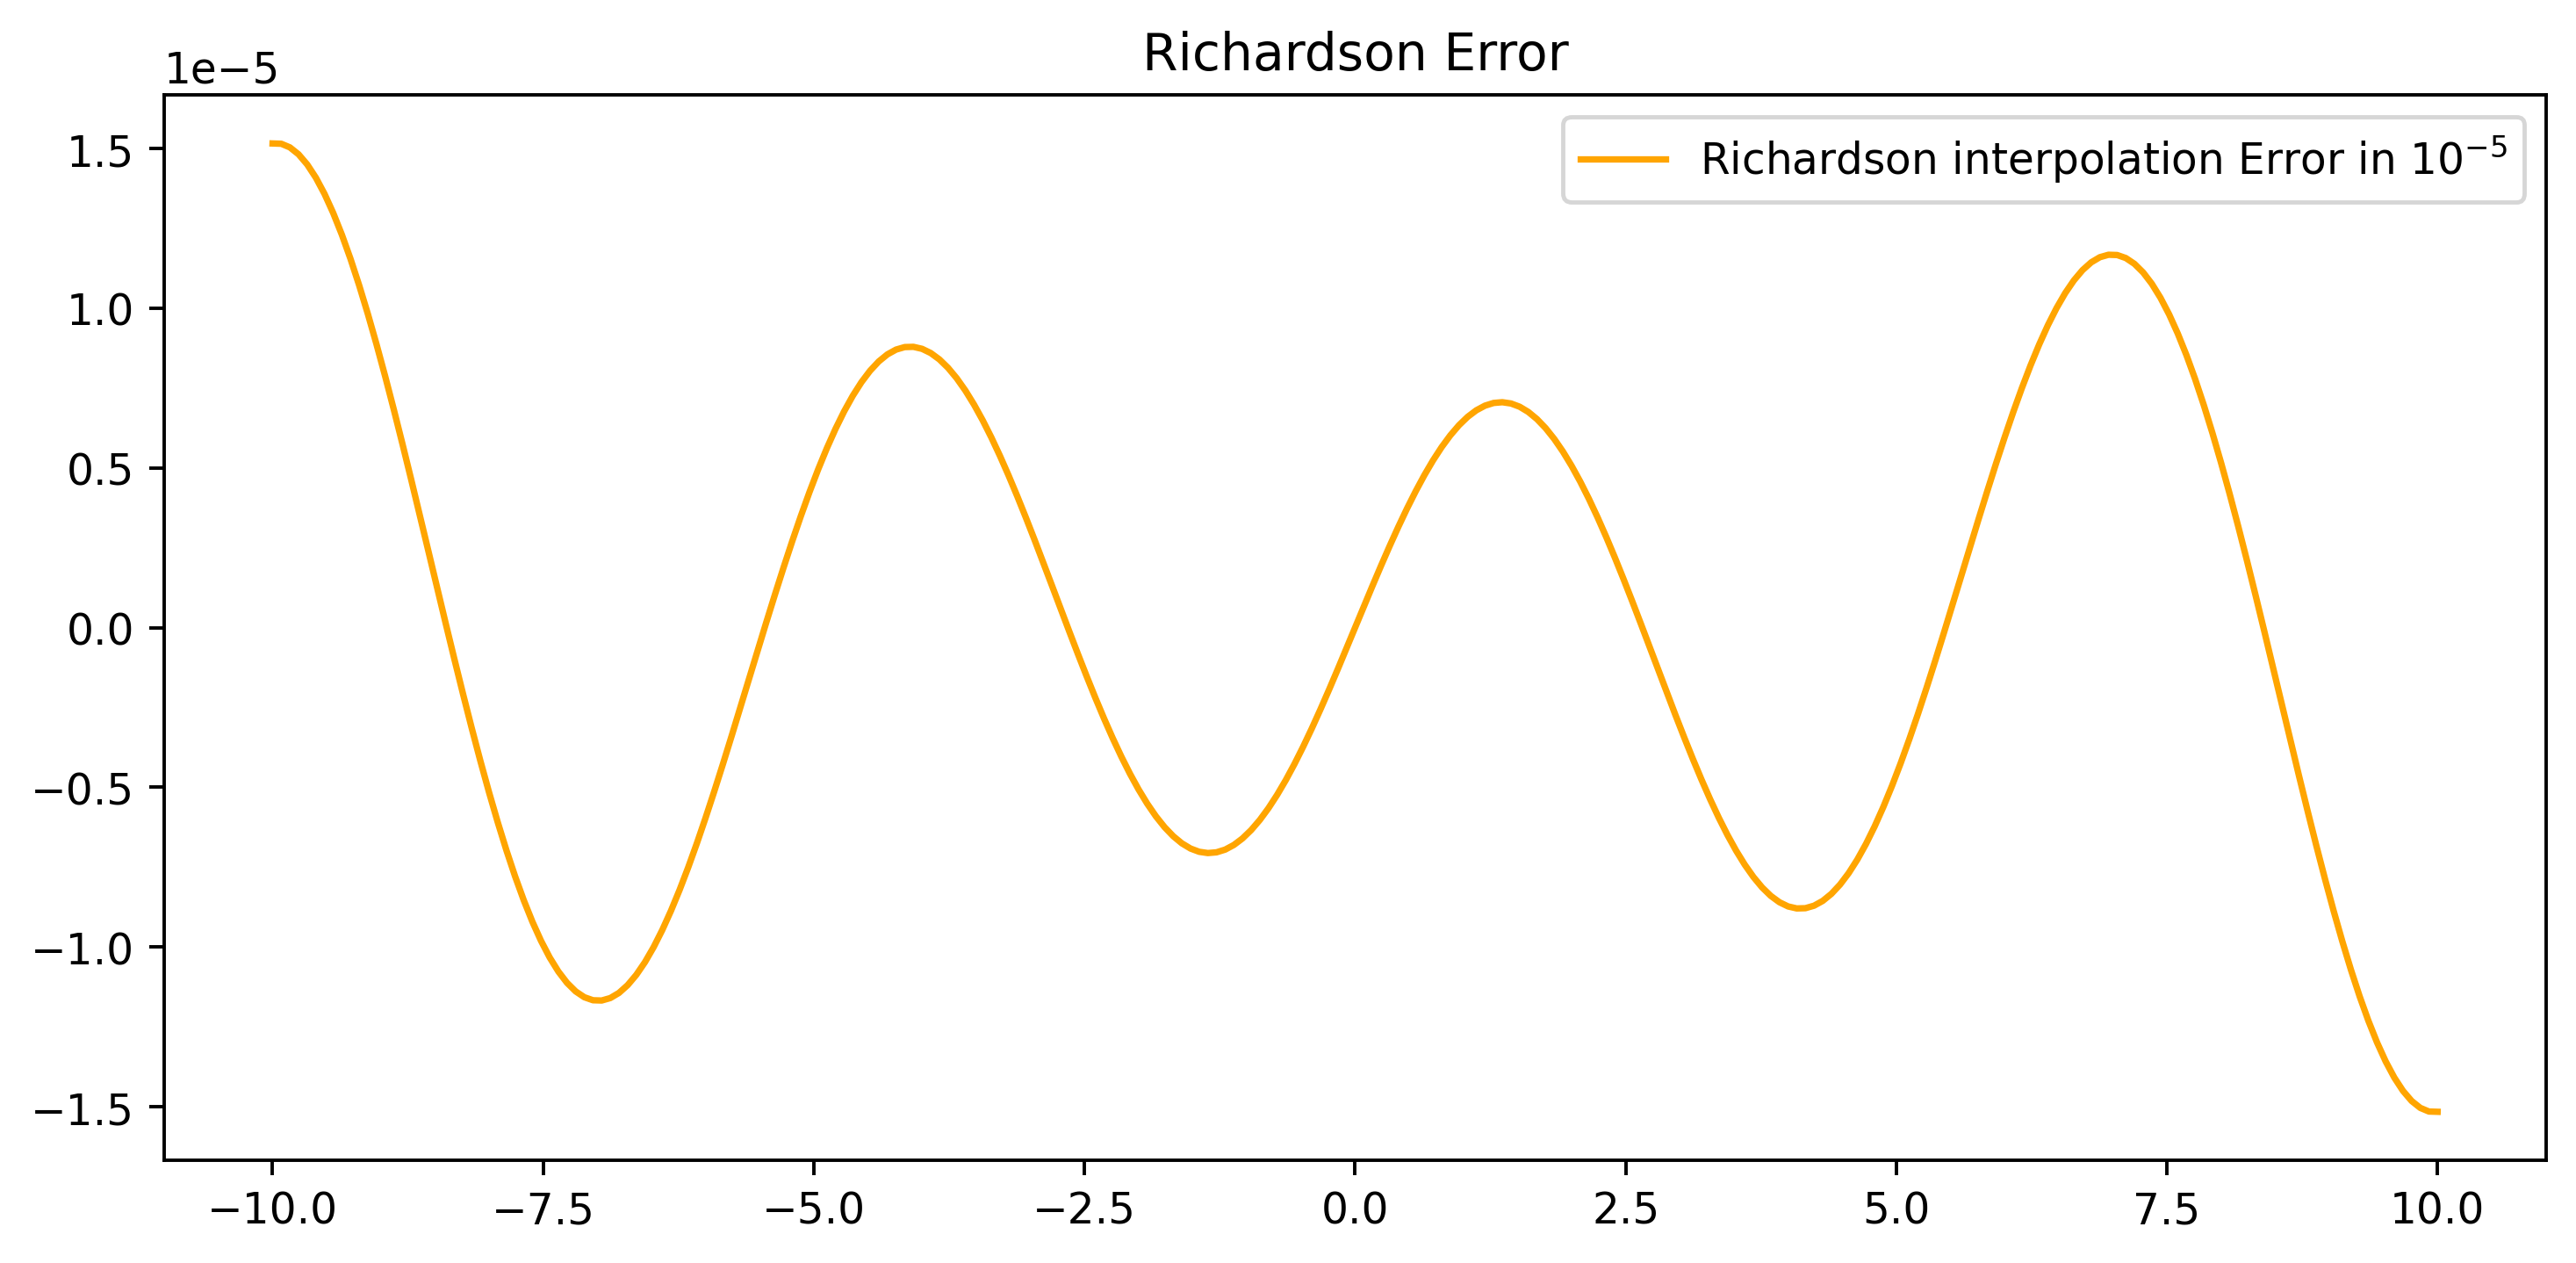

In [312]:

setup_plot_new()
plt.plot(x_array,error_analysis(rich_meth(x_array)),label="Richardson interpolation Error",color="orange")
plt.plot(x_array,error_analysis(cent_diff(x_array)),label="Central Difference error",color="Blue")
plt.legend(loc="upper right")
plt.title("Richardson vs Central Difference Error Comparision")
plt.show()

setup_plot_new()
plt.plot(x_array,error_analysis(rich_meth(x_array)),label="Richardson interpolation Error in $10^{{{-5}}}$",color="orange")
plt.legend(loc="upper right")
plt.title("Richardson Error")
plt.show()


## Calculating the Second order derivative:
We can calculate the second order derivative by finding derivative of the first order derivative from the methods mentioned above.

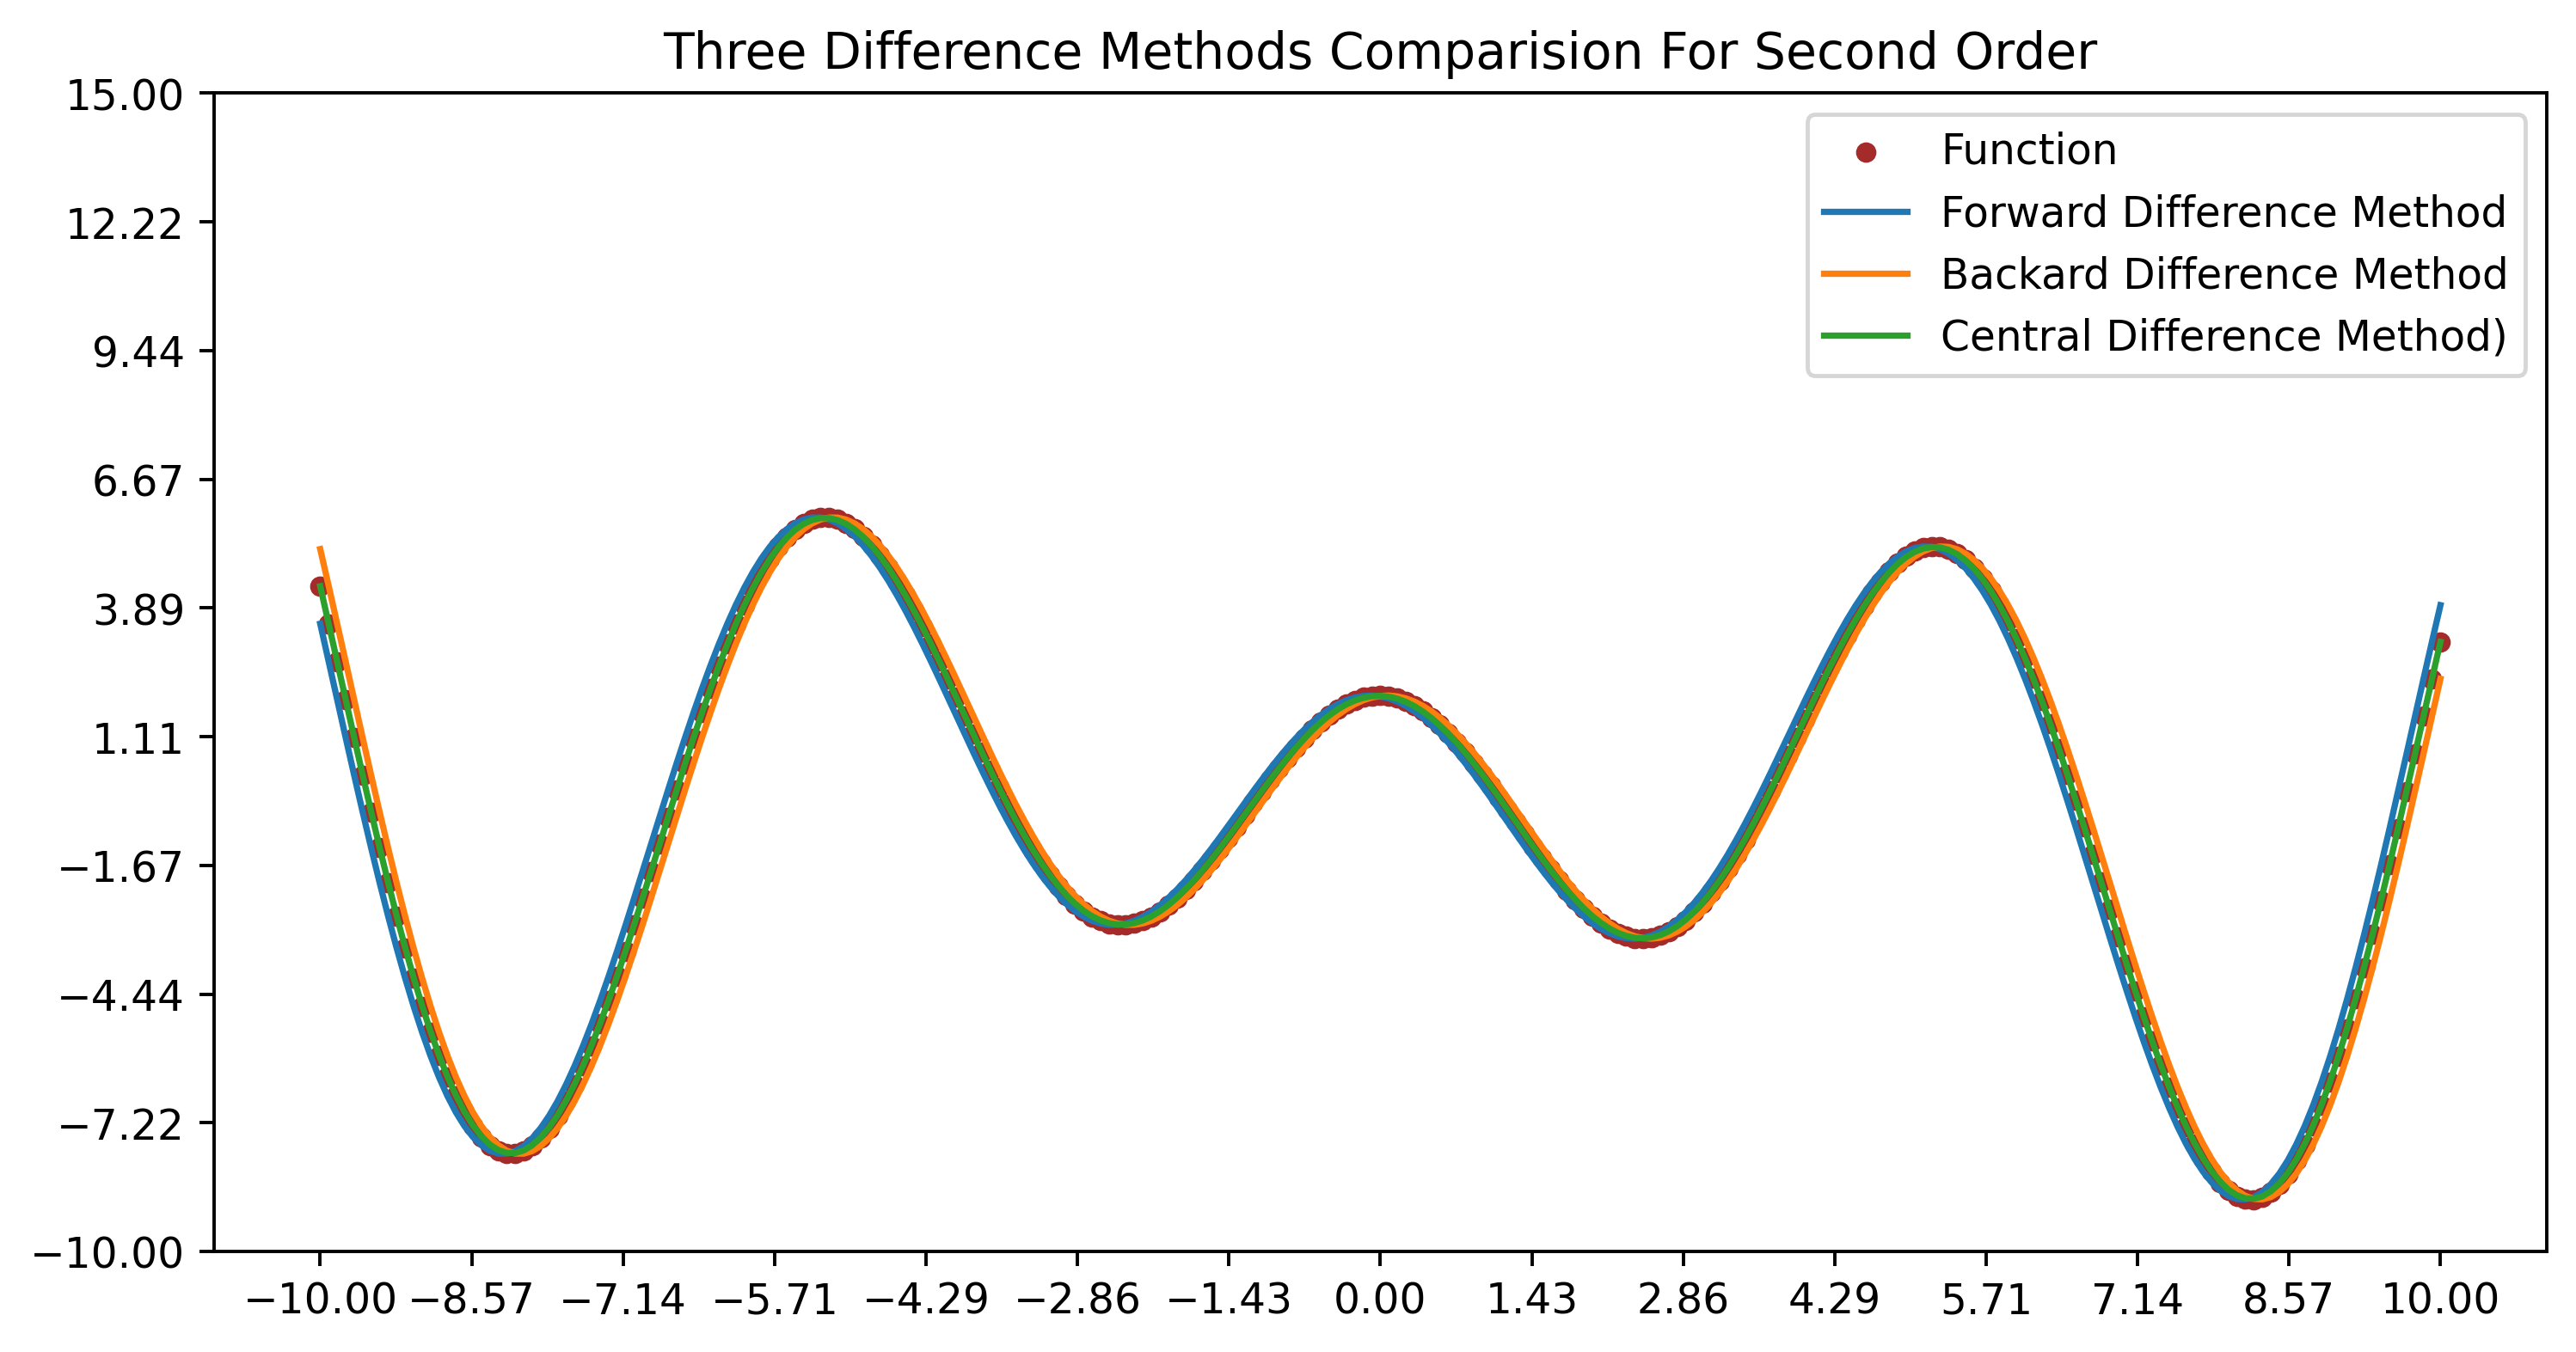

In [313]:
def sec_diff_function(x=x_array):
    return 2*np.cos(x)-x*np.sin(x)-((6/100)*(x))


setup_plot()
plt.scatter(x_array,sec_diff_function(),label="Function",color="brown",s=15)
plt.plot(x_array,for_diff(x_array,f=for_diff),label="Forward Difference Method")
plt.plot(x_array,back_diff(x_array,f=back_diff),label="Backard Difference Method")
plt.plot(x_array,cent_diff(x_array,f=cent_diff),label="Central Difference Method)")
plt.legend(loc="upper right")
plt.title("Three Difference Methods Comparision For Second Order")
plt.show()

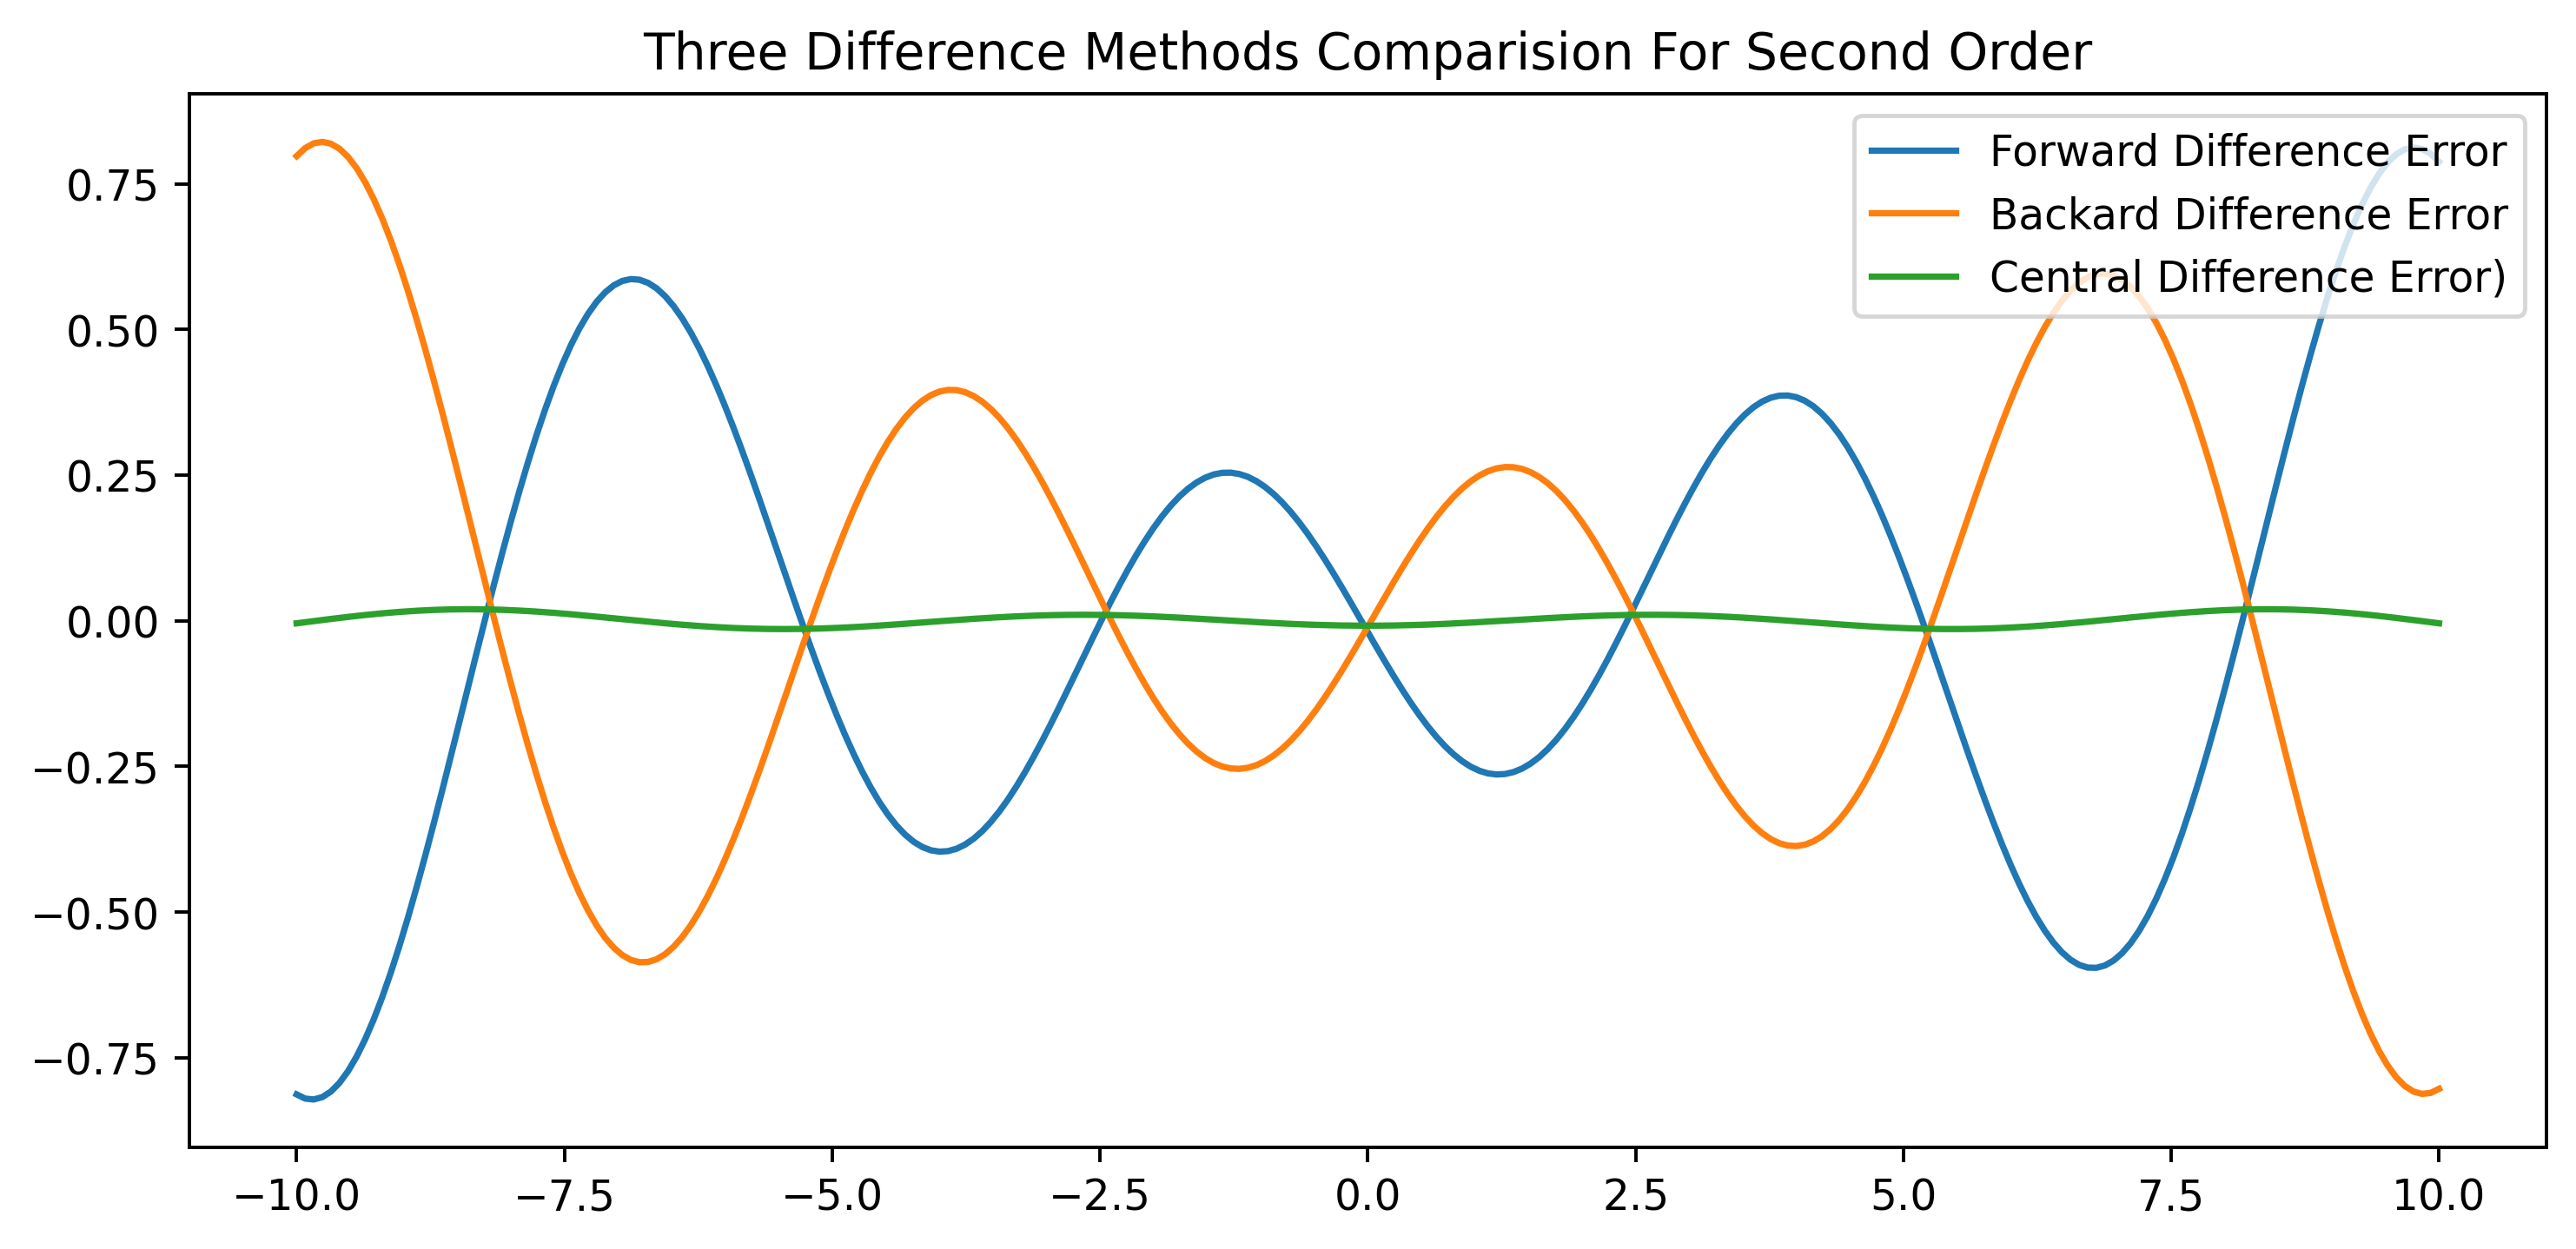

In [314]:
setup_plot_new()
plt.plot(x_array,for_diff(x_array,f=for_diff)-sec_diff_function(),label="Forward Difference Error")
plt.plot(x_array,back_diff(x_array,f=back_diff)-sec_diff_function(),label="Backard Difference Error")
plt.plot(x_array,cent_diff(x_array,f=cent_diff)-sec_diff_function(),label="Central Difference Error)")
plt.legend(loc="upper right")
plt.title("Three Difference Methods Comparision For Second Order")
plt.show()

## Finding Derivative using Real Data

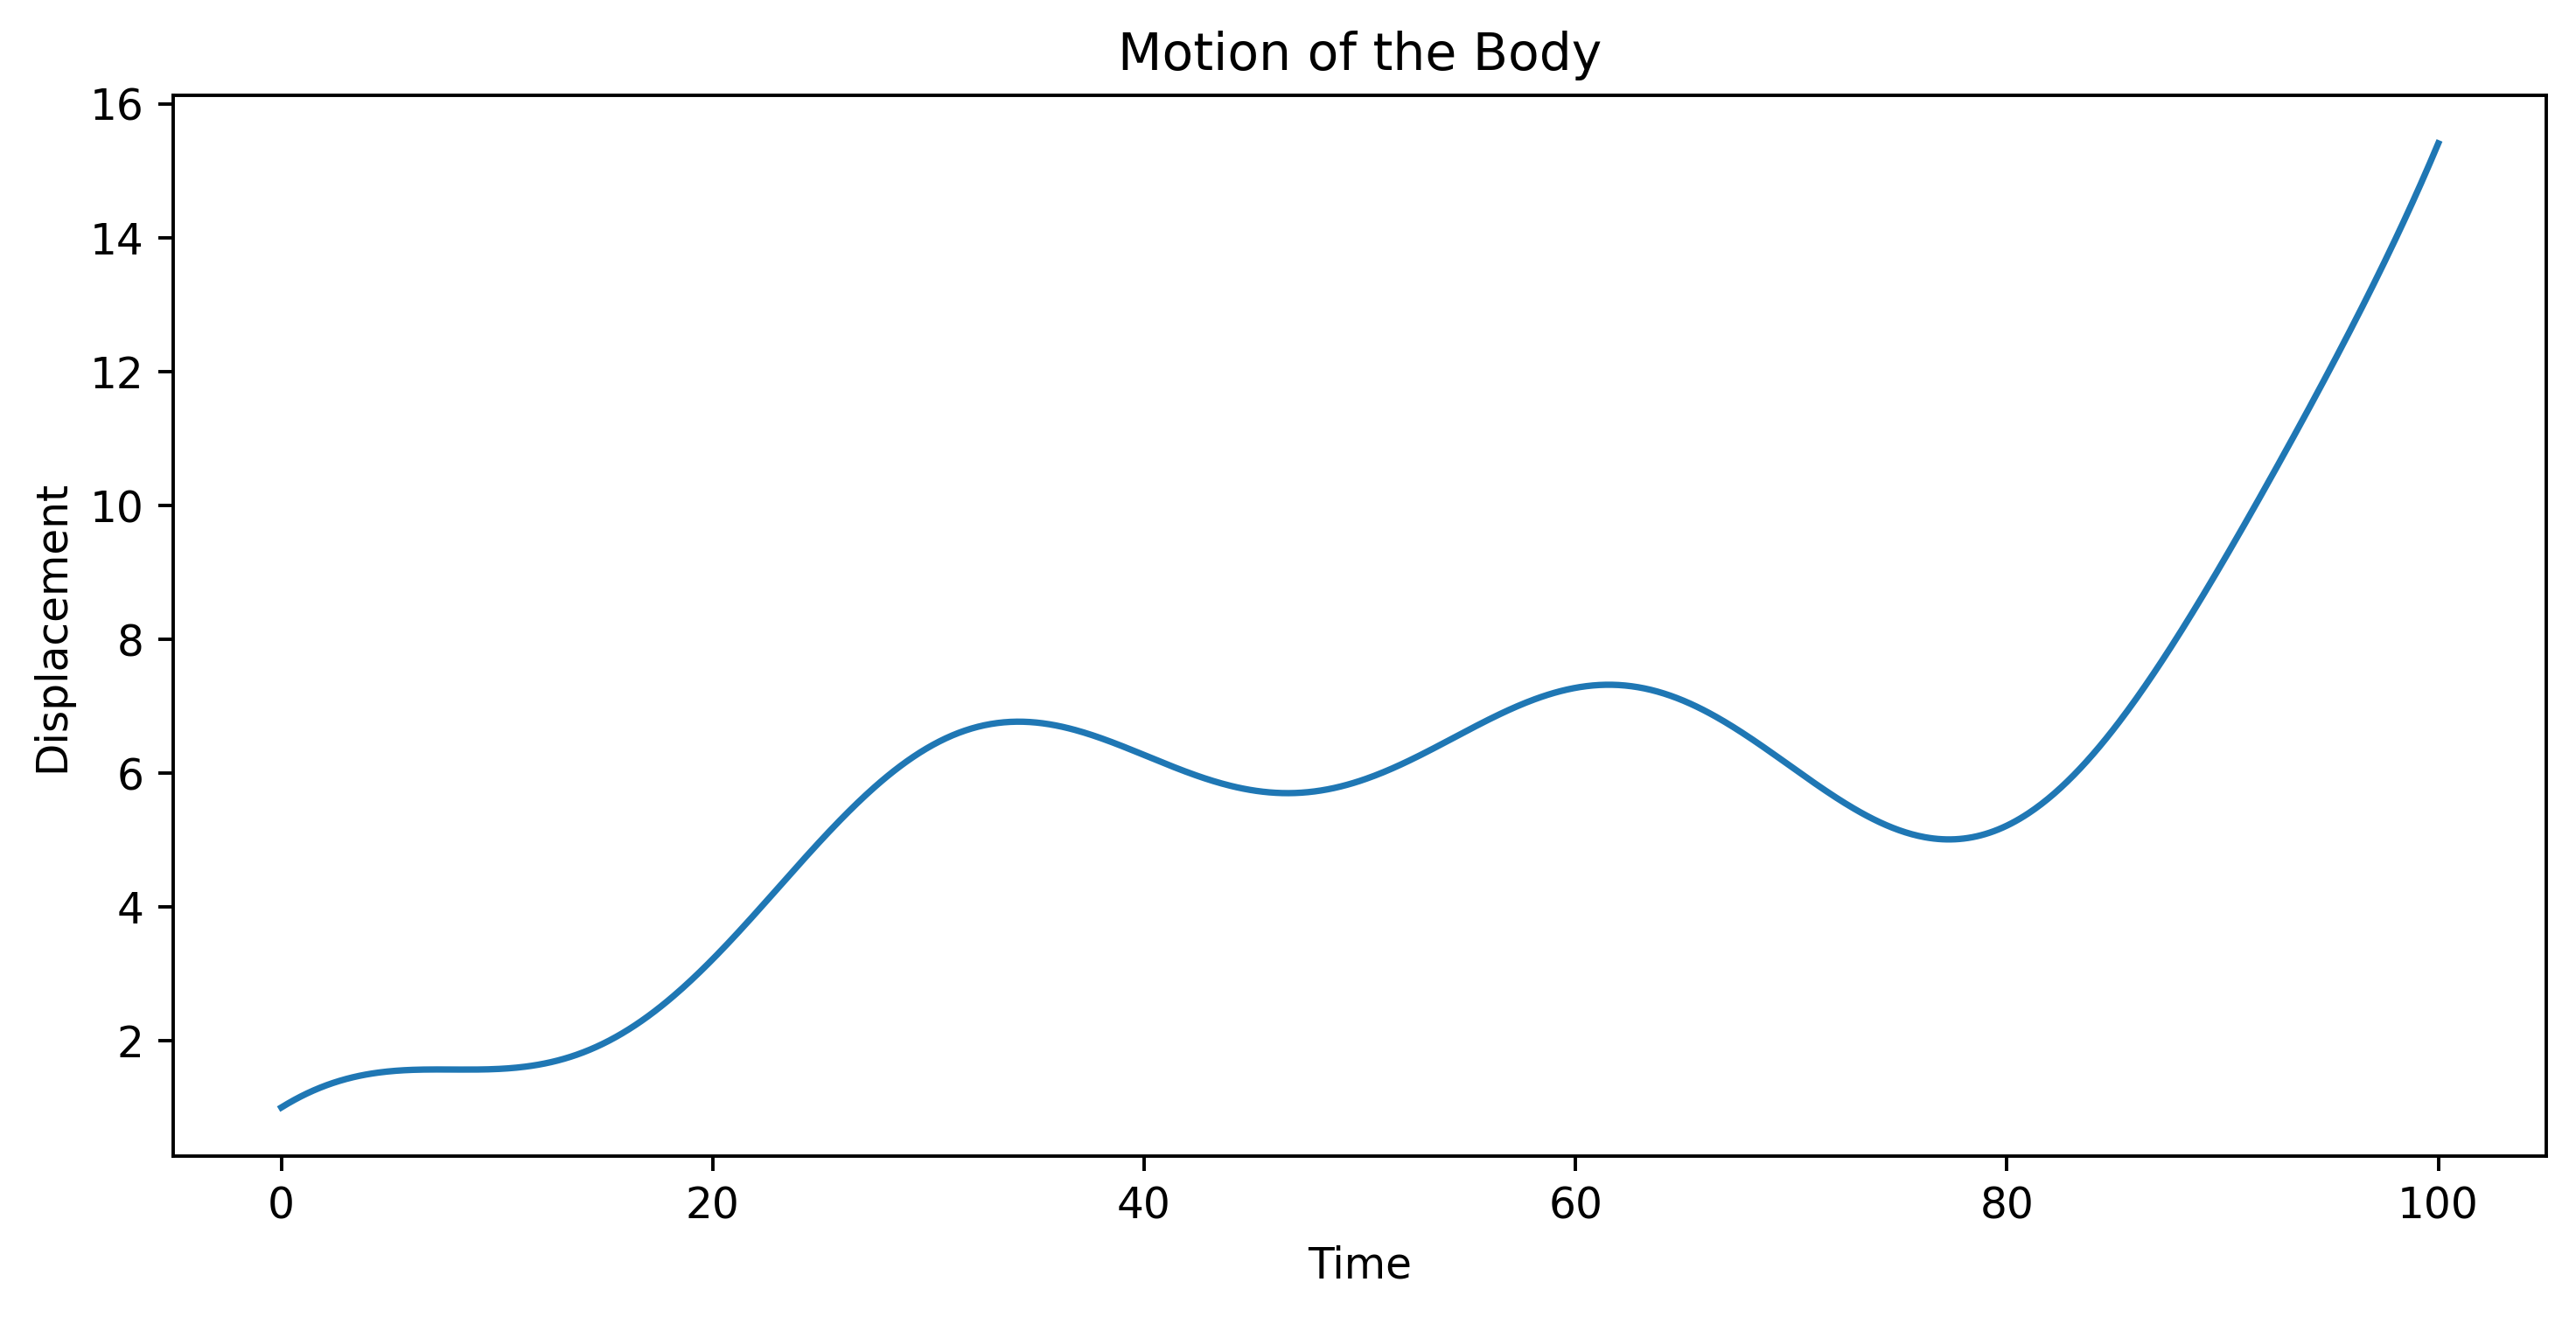

In [315]:
setup_plot_new()
data=np.loadtxt(r"Data\Velocity-acceleration-data-file.dat",dtype=float)
n_max=len(data)
x_array=np.array([ data[n][0] for n in range(n_max)])
y_array=np.array([ data[n][1] for n in range(n_max)])
plt.plot(x_array,y_array)
new_x_array=x_array[1:n_max-1]
new_x_array.reshape(n_max-2)
plt.title("Motion of the Body")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

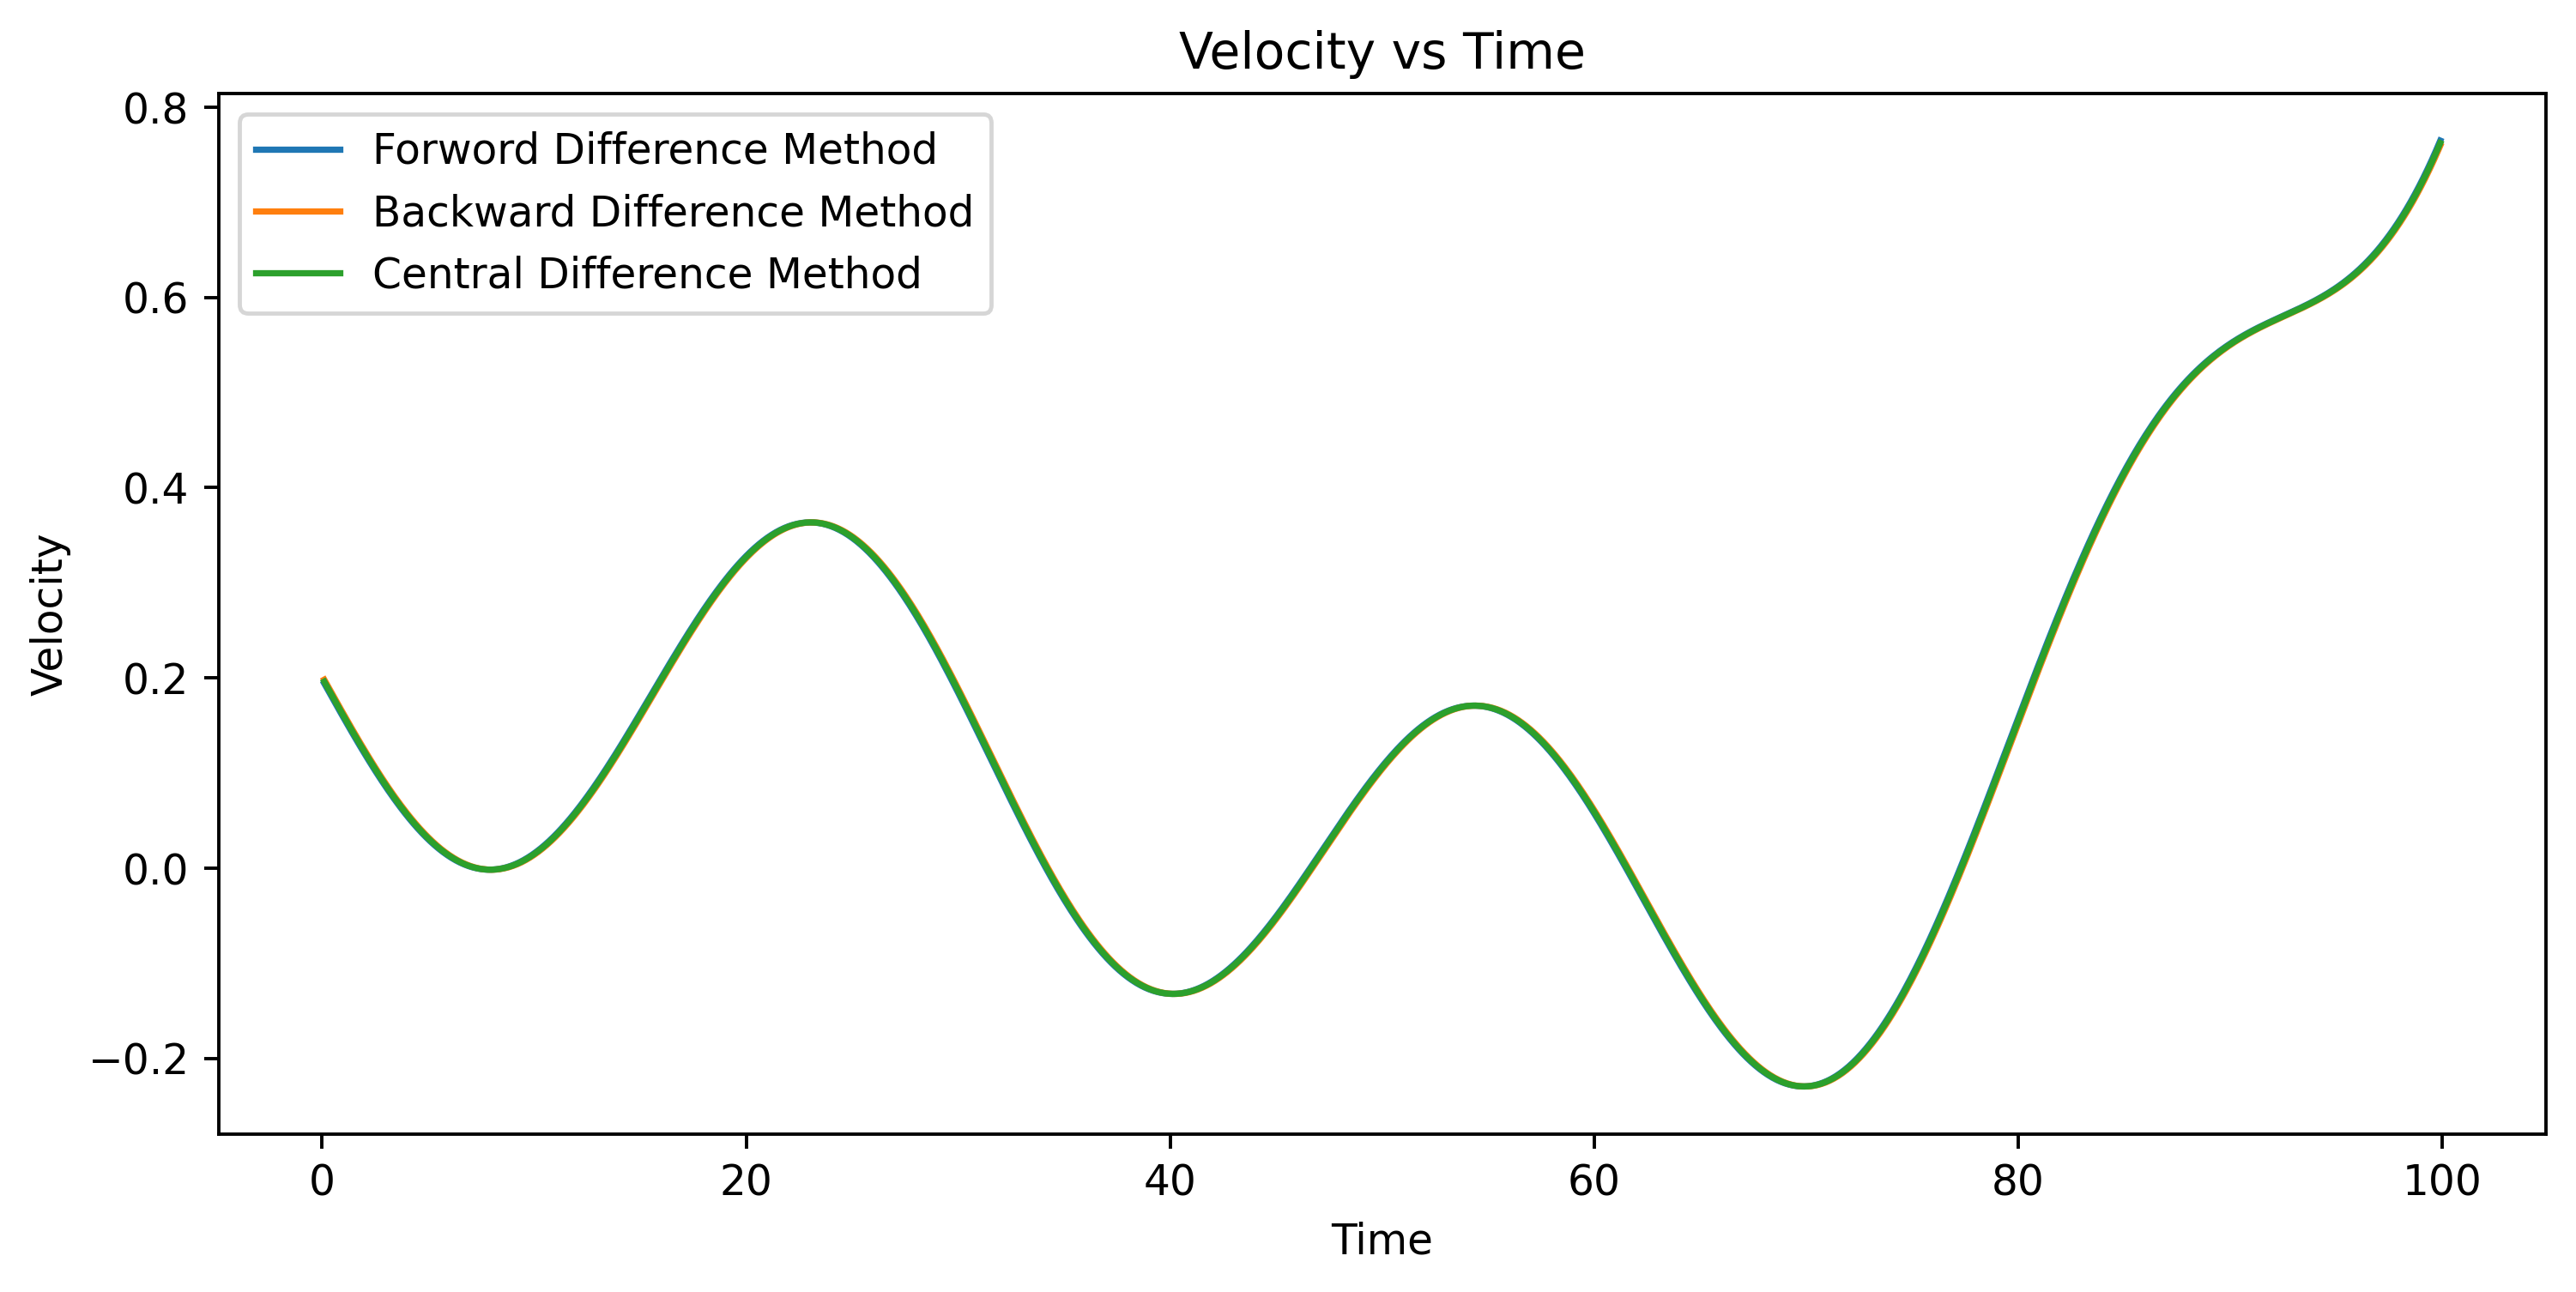

In [316]:
setup_plot_new()

def back_diff(x=x_array,y=y_array):
    n1=len(y)
    array= np.array([((y[n]-y[n-1])/(x[n]-x[n-1]))for n in  range (1,n1-1)])
    return array
def front_diff(x=x_array,y=y_array,):
    n1=len(y)
    array= np.array([((y[n+1]-y[n])/(x[n+1]-x[n]))for n in  range (1,n1-1)])
    return array
def cent_diff(x=x_array,y=y_array,):
    n1=len(y)
    array= np.array([((y[n+1]-y[n-1])/(x[n+1]-x[n-1]))for n in  range (1,n1-1)])
    return array


def vel_plot(f,label,error=False,realpoints=[]):
    y=f()
    if(error==False):
        plt.plot(new_x_array,y,label=label)
    else:
        realpoints=realpoints[1:-1]
        c=y-realpoints
        plt.plot(new_x_array,c,label=label)
        print(f"The Total error in {label}\t{np.dot(c,c)}")

vel_plot(front_diff,label="Forword Difference Method")
vel_plot(back_diff,label="Backward Difference Method")
vel_plot(cent_diff,label="Central Difference Method")

plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity vs Time")
plt.legend()
plt.show()

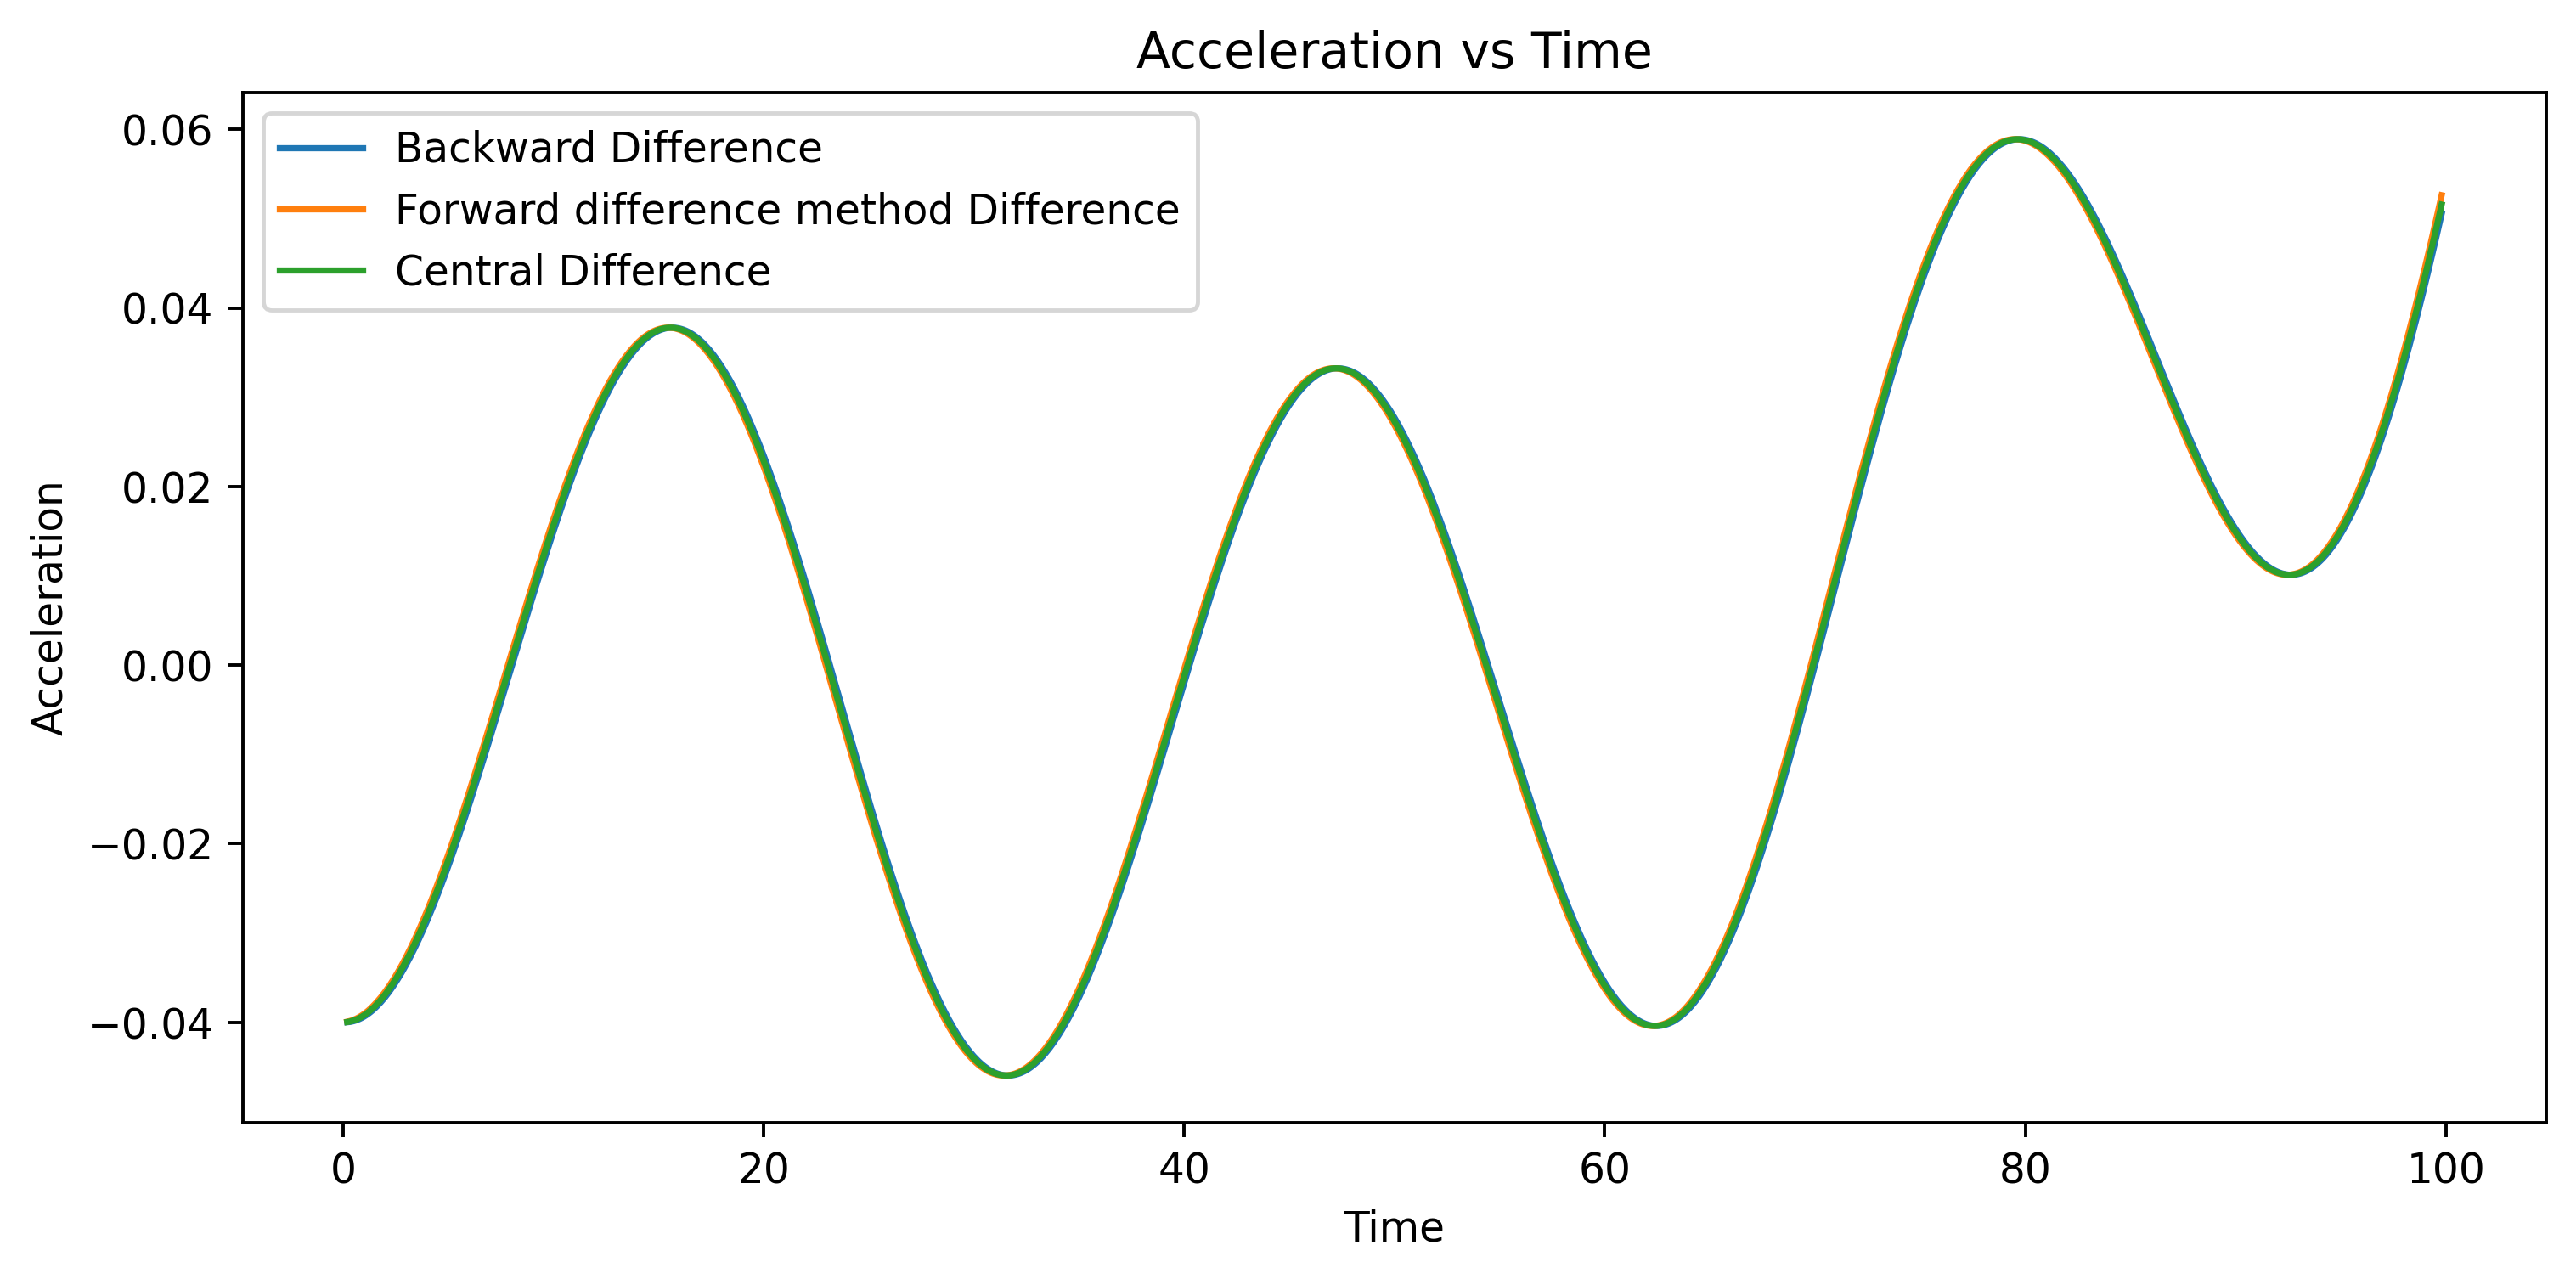

In [317]:
setup_plot_new()
def sec_diff_plot(f,label,error=False,realpoints=[]):
    if(error==False):
        plt.plot(new_x_array[1:-1],f(x=new_x_array,y=f()),label=label)
    else:
        c=f(x=new_x_array,y=f())-realpoints[2:-2]
        plt.plot(new_x_array[1:-1],c,label=label)
        print(f"Total Error in {label}- \t {np.dot(c,c)}")
sec_diff_plot(back_diff,label="Backward Difference")
sec_diff_plot(front_diff,label="Forward difference method Difference")
sec_diff_plot(cent_diff,label="Central Difference")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.title("Acceleration vs Time")
plt.legend()
plt.show()

The Generated data is from the equation
$$x(t)=\cos(at)+bt^5 +ct^4 +dt$$
Parameters:
1. $a=0.2$
2. $0.95 \times 10^{-8}$
3. $c=-1 \times 10^{-6}$
4. $d=0.2$


The Total error in Central difference error	8.934003511493051e-08
The Total error in Forward difference error	0.0024388371001318227
The Total error in Back difference error	0.0024367958117967417


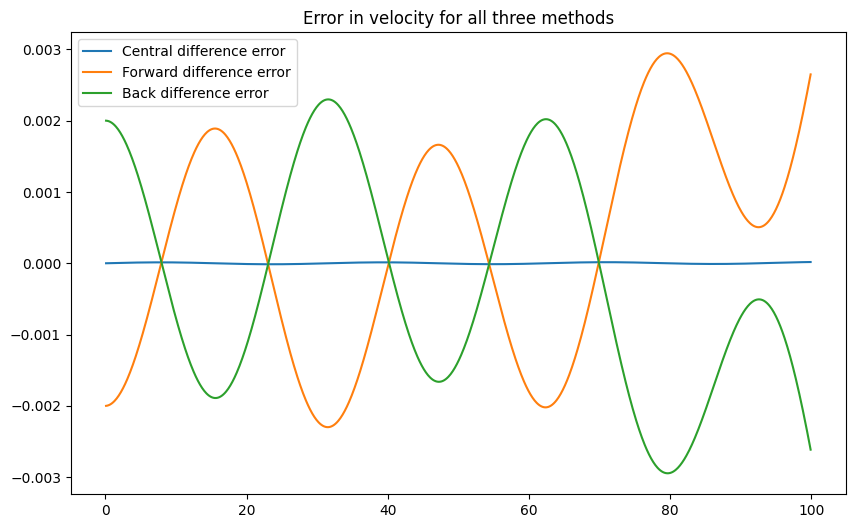

In [318]:
a=0.2
b= 0.95e-8
c=-1e-6
d=0.2
plt.figure(figsize=(10,6))
def analytic_function(t):
    return [np.cos(a*t)+b*(t**5)+c*(t**4)+d*t,- a*np.sin(a*t) + 5*b*(t**4) + 4*c*(t**3) + d,- (a**2)*np.cos(a*t) + 20*b*(t**3) + 12*c*(t**2)]
dis, vel, acc=analytic_function(t=x_array)
vel_plot(cent_diff,label="Central difference error",error=True,realpoints=vel)
vel_plot(front_diff,label="Forward difference error",error=True,realpoints=vel)
vel_plot(back_diff,label="Back difference error",error=True,realpoints=vel)
plt.legend()
plt.title("Error in velocity for all three methods")
plt.show()


Total error in Backward Difference	0.0003198694650823349
Total error in Forward difference 	0.0003211522577162495
Total error in Central Difference	1.4598694421873986e-08


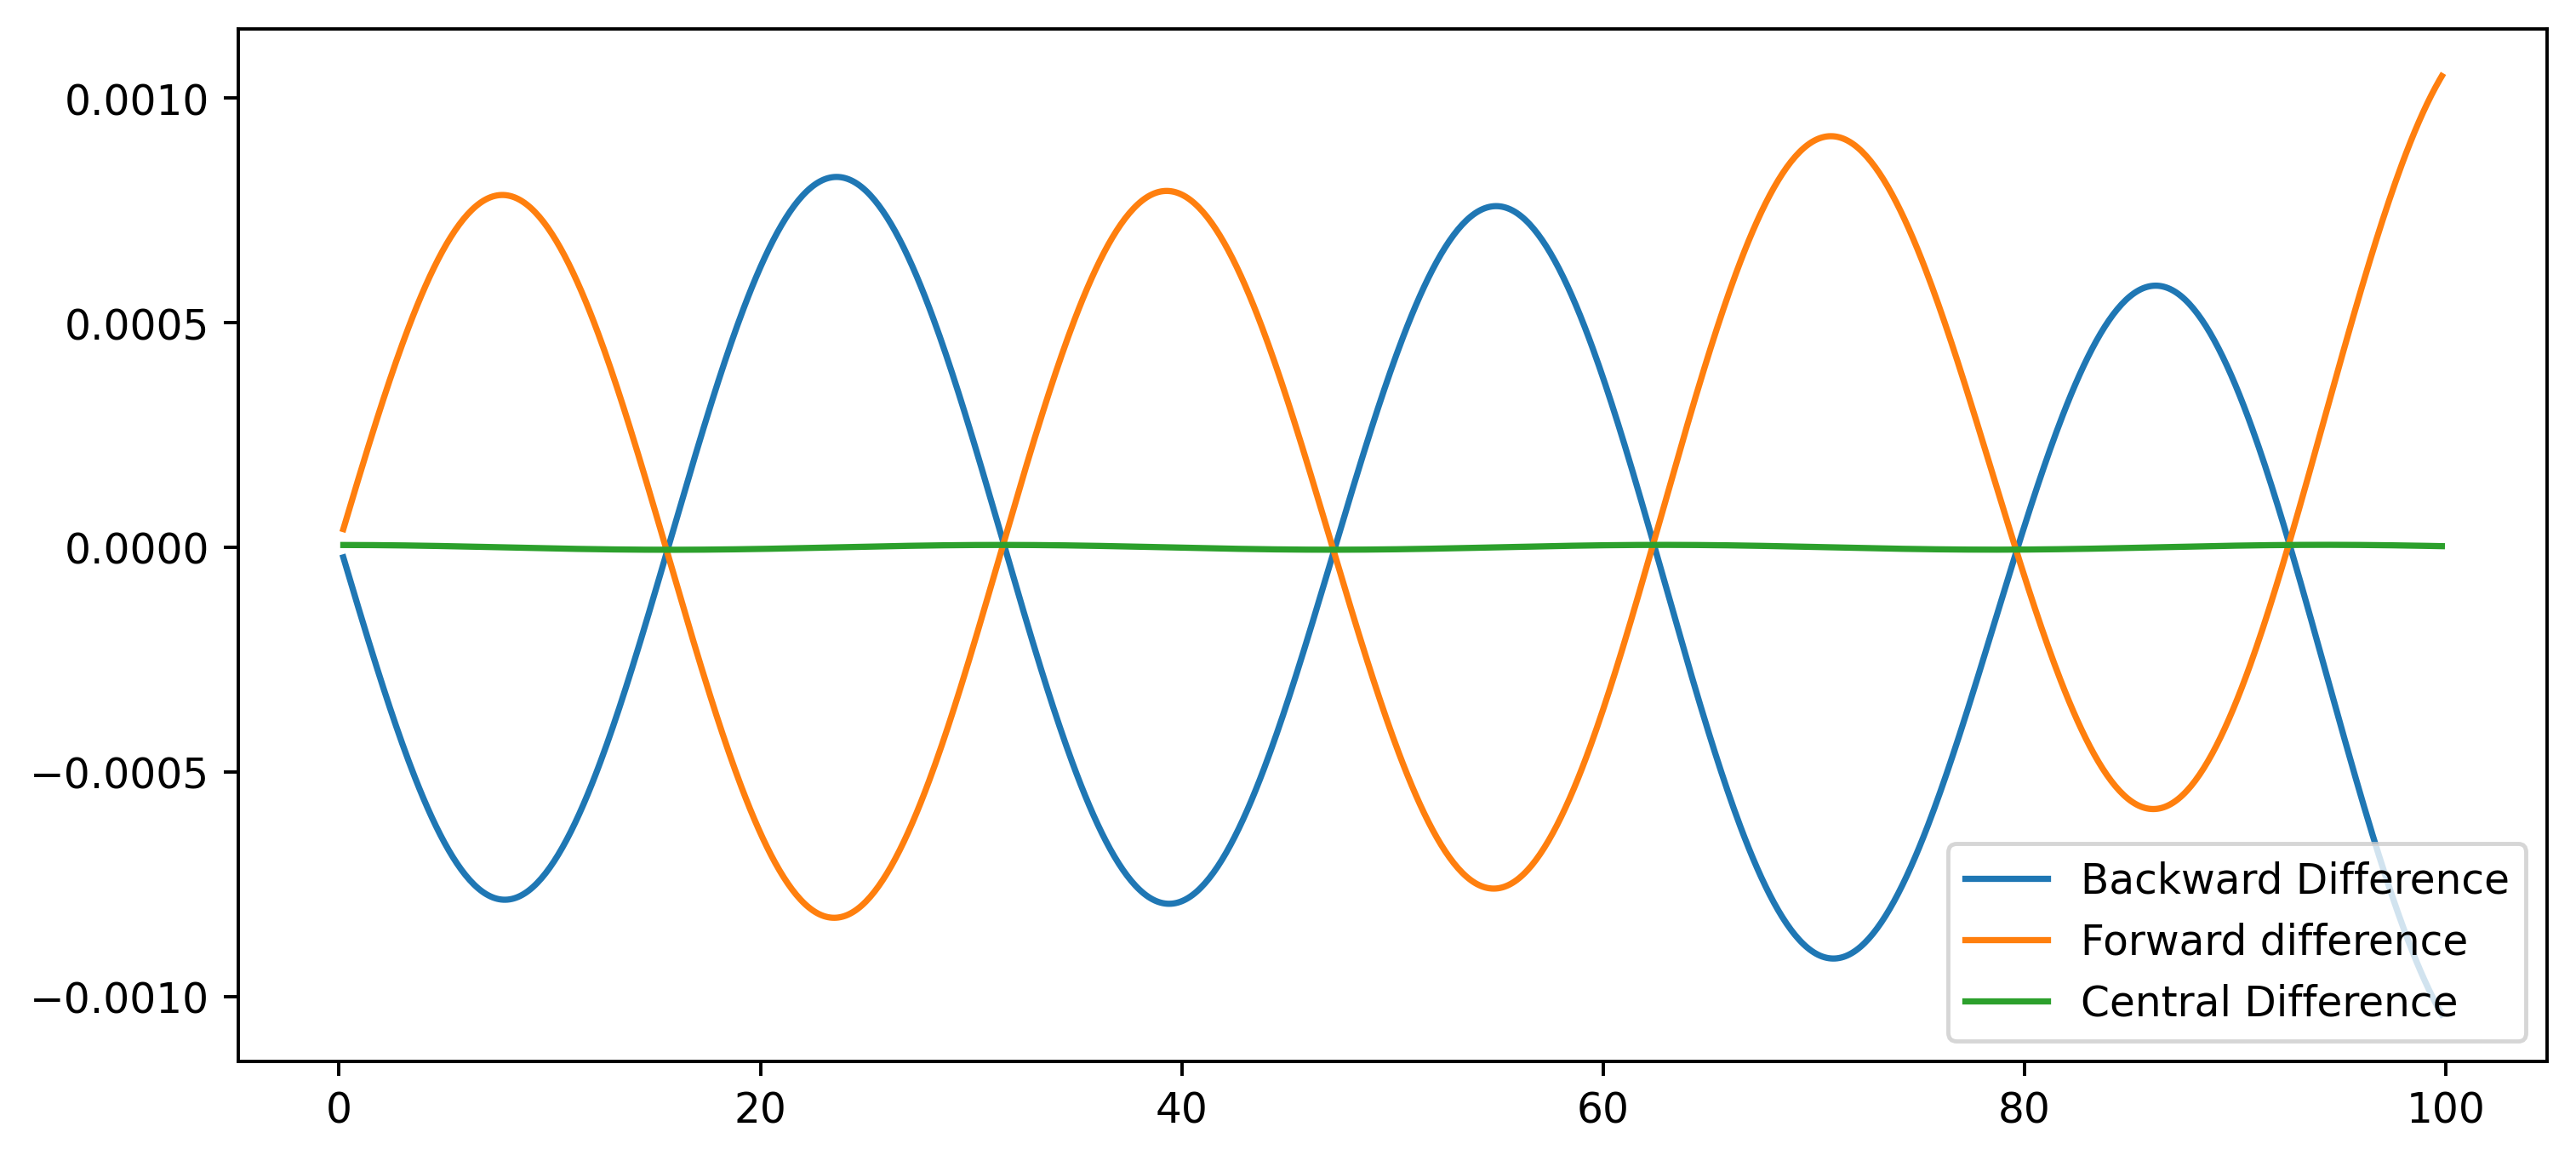

In [319]:
setup_plot_new()
def sec_diff_plot(f,label,error=False,realpoints=[]):
    if(error==False):
        plt.plot(new_x_array[1:-1],f(x=new_x_array,y=f()),label=label)
    else:
        c=f(x=new_x_array,y=f())-realpoints[2:-2]
        plt.plot(new_x_array[1:-1],c,label=label)
        print( f"Total error in {label}\t{np.dot(c,c)}")
sec_diff_plot(back_diff,label="Backward Difference",error=True,realpoints=acc)
sec_diff_plot(front_diff,label="Forward difference ",error=True,realpoints=acc)
sec_diff_plot(cent_diff,label="Central Difference",error=True,realpoints=acc)

plt.legend()
plt.show()

[1 2 3]
